## data preprocessing    






#### remove symbols and duplicate values

In [1]:
def remove_symbols_dupvalues (filename):
    import pandas as pd
    for i in range(15):
        newlevel = ','
        stocklevel = ' --> '
        s = open(filename+str(i+1)+".csv").read()
        s = s.replace (stocklevel ,newlevel) #be careful - will currently replace any number in the file matching stock level!
        f = open(filename+str(i+1)+".csv", 'w')
        f.write(s)
        f.close()
        col_Names=["Time", "Value","","label"]
        df = pd.read_csv(filename+str(i+1)+".csv",names=col_Names)
        q=df['Time'].min()
        df = df.drop(df.index[df['Time'] == q])
        df.to_csv(filename+str(i+1)+".csv", index = False,header=False)


In [2]:
def remove_symbols_dupvalues_test (filename):
    import pandas as pd
    newlevel = ','
    stocklevel = ' --> '
    s = open(filename+".csv").read()
    s = s.replace (stocklevel ,newlevel) #be careful - will currently replace any number in the file matching stock level!
    f = open(filename+".csv", 'w')
    f.write(s)
    f.close()
    col_Names=["Time", "Value","","label"]
    df = pd.read_csv(filename+".csv",names=col_Names)
    q=df['Time'].min()
    df = df.drop(df.index[df['Time'] == q])
    df.to_csv(filename+".csv", index = False,header=False)

## feature extraction

In [3]:
def featureextraction (filename,feature_filename):
    import pandas as pd
    for i in range(15):
        #define column names
        col_Names=["Time", "Value","","label"]
        dataframe = pd.read_csv(filename+str(i+1)+".csv",parse_dates=['Time'],names=col_Names)

        dataframe.dtypes

        dataframe['Time'] = pd.to_datetime(dataframe['Time'], infer_datetime_format = True)


        dataframe.dtypes

        #set time as index
        indexed_dataset = dataframe.set_index(['Time'])

        indexed_dataset.index.inferred_type == "datetime64"

        indexed_dataset.dtypes

        indexed_dataset.head()

        #remove non value row
        indexed_dataset = indexed_dataset.iloc[:-1 , :]

        #remove NAN column
        indexed_dataset = indexed_dataset.dropna(axis=1)


        indexed_dataset

        indexed_dataset.dtypes

        indexed_dataset.index.inferred_type == "datetime64"
    
        #define value as float
        indexed_dataset['Value'] = indexed_dataset['Value'].astype(float)


        indexed_dataset.dtypes


        #get dropvalue feature
        indexed_dataset['dropValue'] = indexed_dataset['Value'].diff()
    
        #get rollmean feature
        indexed_dataset['rollmean'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).mean()
    
        #get rollmedian feature
        indexed_dataset['rollmedian'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).median()
    
        #get rollstd feature
        indexed_dataset['rollstd'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).std()
    
        #get rollmax feature
        indexed_dataset['rollMax'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).max()
    
        #get rollmin feature
        indexed_dataset['rollMin'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).min()

        indexed_dataset
    
        #remove non value rows
        indexed_dataset = indexed_dataset.iloc[1: , :]


        indexed_dataset

        #write to csv files
        indexed_dataset.to_csv(feature_filename+str(i+1)+".csv", index = True)



In [44]:
def featureextraction_test (filename,feature_filename):
    import pandas as pd
    #define column names
    col_Names=["Time", "Value","","label"]
    dataframe = pd.read_csv(filename+".csv",parse_dates=['Time'],names=col_Names)

    dataframe.dtypes

    dataframe['Time'] = pd.to_datetime(dataframe['Time'], infer_datetime_format = True)


    dataframe.dtypes

    #set time as index
    indexed_dataset = dataframe.set_index(['Time'])

    indexed_dataset.index.inferred_type == "datetime64"

    indexed_dataset.dtypes

    indexed_dataset.head()

    #remove non value row
    indexed_dataset = indexed_dataset.iloc[:-1 , :]

    #remove NAN column
    indexed_dataset = indexed_dataset.dropna(axis=1)


    indexed_dataset

    indexed_dataset.dtypes

    indexed_dataset.index.inferred_type == "datetime64"
    
    #define value as float
    indexed_dataset['Value'] = indexed_dataset['Value'].astype(float)


    indexed_dataset.dtypes


    #get dropvalue feature
    indexed_dataset['dropValue'] = indexed_dataset['Value'].diff()
    
    #get rollmean feature
    indexed_dataset['rollmean'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).mean()
    
    #get rollmedian feature
    indexed_dataset['rollmedian'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).median()
    
    #get rollstd feature
    indexed_dataset['rollstd'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).std()
    
    #get rollmax feature
    indexed_dataset['rollMax'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).max()
    
    #get rollmin feature
    indexed_dataset['rollMin'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).min()

    indexed_dataset
    
    #remove non value rows
    indexed_dataset = indexed_dataset.iloc[1: , :]


    indexed_dataset

    #write to csv files
    indexed_dataset.to_csv(feature_filename+".csv", index = True)


#### analys graphs

In [5]:
def analys_values (feature_filename):
    import pandas as pd
    import seaborn as sns
    for i in range(15):
        df=pd.read_csv(feature_filename+str(i+1)+".csv")
        df.label.replace(('YES', 'NO'), (1, 0), inplace=True)
        df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
        sns.scatterplot(data=df, x='Time', y='Value', hue='label')
        #print ("\n")

#### put csv to data frames

In [6]:
def put_csv_to_dataframe(feature_filename):
    import pandas as pd

    dataframes_list = []

    for i in range(15):
        df=pd.read_csv(feature_filename+str(i+1)+".csv")
        dataframes_list.append(df)
        
    return dataframes_list


In [7]:
def put_csv_to_dataframe_test(feature_filename):
    import pandas as pd

    dataframes_list = []

    for i in range(1):
        df=pd.read_csv(feature_filename+".csv")
        dataframes_list.append(df)
        
    return dataframes_list

#### display 13th dataframe with features

In [8]:
def display_13th_df (dataframes_list):
    display(dataframes_list[13])
 

#### put all dfs to one

In [9]:
def put_list_to_df(dataframes_list):
    import pandas as pd
    df1=pd.concat(dataframes_list)
    return df1

#### convert datetime to object

In [10]:
def datetime_to_obj(df1):
    import pandas as pd
    df1['Time'] = pd.to_datetime(df1['Time'], infer_datetime_format = True)
    display("prev df1 type")
    display(df1.dtypes)
    df1['Time']=df1['Time'].dt.time 
    display(df1)
    display("after df1 type")
    display(df1.dtypes)
    return df1


#### reset indexes of dataframe

In [11]:
def reset_index(df1):
    df2=df1
    df2.index = range(len(df2))
    display('reset indexed dataframe')
    display(df2)
    return df2

### Class Imbalance

In [12]:
def analys_class_imbalance(df2):
    import pandas as pd
    import matplotlib.pyplot as plt
    display(df2.head())
    X = df2.iloc[:, 3:9].values
    y = df2.iloc[:, 2].values
    count_classes = pd.value_counts(y, sort = True)

    count_classes.plot(kind = 'bar', rot=0)

    plt.title("Distribution of y")

    plt.xlabel("Class")
    
    plt.ylabel("Frequency")
    
    # class count
    class_count_0, class_count_1 = df2['label'].value_counts()

    # Separate class
    class_0 = df2[df2['label'] == 'NO']
    class_1 = df2[df2['label'] == "YES"]# print the shape of the class
    print('NO:', class_0.shape[0]/(class_1.shape[0]+class_0.shape[0])*100,"%")
    print('YES:', class_1.shape[0]/(class_1.shape[0]+class_0.shape[0])*100, "%")
    

## Model training

### define x and y 

In [13]:
def define_x(df2):
    X = df2.iloc[:, 3:9].values
    return X

In [14]:
def define_y(df2):
    y = df2.iloc[:, 2].values
    return y

In [15]:
def define_x_wextra_f(df4):
    X = df4.iloc[:, 3:32].values
    return X

In [16]:
def define_y_wextra_f(df4):
    y = df2.iloc[:, 2].values
    return y

In [17]:
def x_y_info(X,y):
    print('X.shape')
    print(X.shape)
    print('y.shape')
    print(y.shape)
    print("X")
    print(X)
    print("y")
    print(y)
    

### devide data into train and test

In [18]:
def devide_training_testing(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    return [X_train, X_test, y_train, y_test]

### train the models


In [19]:
def train_model_svm_rbf(X_train, y_train):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
    return classifier 
    

In [20]:
def train_model_svm_linear(X_train, y_train):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    return classifier

In [21]:
def train_model_logistic_regression(X_train, y_train): 
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(max_iter=3000000)
    classifier.fit(X_train,y_train)
    return classifier

In [22]:
def train_model_lightgbm(X_train, y_train):
    from lightgbm import LGBMClassifier
    modellgbm = LGBMClassifier()
    modellgbm.fit(X_train,y_train)
    return modellgbm

In [23]:
def train_model_xgboost(X_train, y_train):    
    from xgboost import XGBClassifier
    modelxgb = XGBClassifier()
    modelxgb.fit(X_train,y_train)
    return modelxgb

In [24]:
def train_model_ann(X_train, Y_train):
    ann.fit(X_train,Y_train,batch_size=32,epochs = 100)
    return ann

In [25]:
def train_model_randomforest(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    clf=RandomForestClassifier()
    clf.fit(X_train,y_train)
    return clf

In [26]:
def train_model_rf_normalization(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    clf=RandomForestClassifier  (n_estimators=100)
    clf.fit(X_train,y_train)
    return clf    

In [27]:
def train_model_rf_Normalization_sampling_woscoring(random_grid,X_train,y_train):
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier()
    rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
    ### fit the randomized model
    rf_randomcv.fit(X_train,y_train)
    return rf_randomcv

In [28]:
def train_model_rf_Normalization_sampling_wscoring(random_grid,X_train,y_train):
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier()
    rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,scoring='f1_macro',
                               random_state=0,n_jobs=-1)
    ### fit the randomized model
    rf_randomcv.fit(X_train,y_train)
    return rf_randomcv

### model saving

In [29]:
def model_to_pickle(classifier,name):
    import pickle
    pickle.dump(classifier, open('model'+name+'.pkl', 'wb'))

### predict test data

In [30]:
def prediction_and_accuracy(X_test,y_test,classifier):
    import pickle
    y_pred = classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
    print(confusion_matrix(y_test,y_pred))
    print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
    print("Classification report: \n{}".format(classification_report(y_test,y_pred)))
   
    

### Normalization

In [31]:
def normalization(X):
    # data normalization with sklearn
    from sklearn.preprocessing import MinMaxScaler

    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_norm = norm.transform(X)
    return X_norm


### SMOTE ENN

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/


https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

In [32]:
def smote_enn(X_train, y_train):
    # import library
    from typing import Counter
    from imblearn.combine import SMOTEENN
    counter = Counter(y_train)
    print('Before',counter)
    #oversampling the train dataset using SMOTE + ENN
    smenn = SMOTEENN()

    # fit predictor and target variable
    X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)
    counter = Counter(y_train_smenn)
    print('After',counter)
    return [X_train_smenn, y_train_smenn]

### SMOTE

In [33]:
def smote(X_train, y_train):
    from typing import Counter
    # import library
    from imblearn.over_sampling import SMOTE
    counter = Counter(y_train)
    print('Before',counter)
    #oversampling the train dataset using SMOTE
    smote = SMOTE()

    # fit predictor and target variable
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
    counter = Counter(y_train_sm)
    print('After',counter)
    return [X_train_sm, y_train_sm]

## Random Grid

In [34]:
def rs_random_grid(depth_arr):
    import numpy as np
    from sklearn.model_selection import RandomizedSearchCV
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
    # Number of features to consider at every split
    ##max_features = ['auto', 'sqrt','log2']
    # Maximum number of levels in tree
    #max_depth = [10,1000,10]
    max_depth = depth_arr
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10,14]
    # Minimum number of samples required at each leaf node
    ##min_samples_leaf = [1, 2, 4,6,8]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
               ##'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               ##'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
    print(random_grid)
    return random_grid


### New Feature Creation

In [35]:
def new_feature_creation(df4):
    df4['meanplusmedian']=df4['rollmean']+df4['rollmedian']
    df4['maxplusmin']=df4['rollMax']+df4['rollMin']
    df4['meanplusmax']=df4['rollmean']+df4['rollMax']
    df4['meanplusmin']=df4['rollmean']+df4['rollMin']
    df4['medianplusmax']=df4['rollmedian']+df4['rollMax']
    df4['medianplusmin']=df4['rollmedian']+df4['rollMin']
    df4['medianminusmean']=df4['rollmedian']+df4['rollmean']
    df4['medianminusmean']=df4['rollmedian']+df4['rollmean']
    df4['medianminusmeanminusstd']=df4['rollmedian']+df4['rollmean']-df4['rollstd']
    df4['maxminusmin']=df4['rollMax']-df4['rollMin']
    df4['meanplusmaxplusmin']=df4['rollmean']+df4['rollMax']+df4['rollMin']
    df4['medianplusmaxplusmin']=df4['rollmedian']+df4['rollMax']+df4['rollMin']
    df4['meanmulmedian']=df4['rollmean']*df4['rollmedian']
    df4['maxmulmin']=df4['rollMax']*df4['rollMin']
    df4['meanmulmax']=df4['rollmean']*df4['rollMax']
    df4['meanmulmin']=df4['rollmean']*df4['rollMin']
    df4['medianmulmax']=df4['rollmedian']*df4['rollMax']
    df4['medianmulmin']=df4['rollmedian']*df4['rollMin']
    df4['medianmulmean']=df4['rollmedian']*df4['rollmean']
    df4['medianmulmean']=df4['rollmedian']*df4['rollmean']
    df4['medianmulmeanmulstd']=df4['rollmedian']*df4['rollmean']*df4['rollstd']
    df4['meanmulmaxmulmin']=df4['rollmean']*df4['rollMax']*df4['rollMin']
    df4['medianmulmaxmulmin']=df4['rollmedian']*df4['rollMax']*df4['rollMin']
    return df4

### Time conversion test

In [51]:
def time_conversion_test(df2):
    import pandas as pd
    from datetime import timedelta
    df3=df2
    df3.info()
    df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S')
    df3.info()
    df3
    df3.index
    df4=df3
    return df4

### Predict test data

In [37]:
def predict_data(X_normg,model_name):    
    import pickle
    pickled_model = pickle.load(open(model_name+'.pkl', 'rb'))
    predictarrall=pickled_model.predict(X_normg)
    print(predictarrall)
    return predictarrall

### drowsy percentage

In [104]:
def drowsy_percentage(df4,model_name):
    time1 = df4.loc[0,'Time']
    pickled_model = pickle.load(open(model_name+'.pkl', 'rb'))
    percentage = 0
    rows=0
    while ((rows+120)<len(df4.index)):
      type(time1)
      end_time = time1 + timedelta(minutes = 2)
      end_time
      iArray=df4.index[df4['Time']==end_time].tolist()
      rows=iArray[0]
      df5=df4.loc[(df4['Time'] >= time1) & (df4['Time'] <= end_time)]
      df5
      X_testactual = df5.iloc[:, 3:32].values
      X_testactual
      # data normalization with sklearn
      from sklearn.preprocessing import MinMaxScaler
      # fit scaler on training data
      norm = MinMaxScaler().fit(X_testactual)
      # transform training data
      X_norm = norm.transform(X_testactual)
      arr=pickled_model.predict(X_norm)
      arr
      cot=0
      for tag in arr:
          if(tag=='YES'):
              cot=cot+1
      percentage=cot/len(arr)*100
      print(str(percentage)+"%")
      time1=end_time

### visualize actual test data

In [39]:
def visualize_actual_testdata(filename):
    import pandas as pd
    import seaborn as sns
    for i in range(1):
        df=pd.read_csv(filename+".csv")
        df.label.replace(('YES', 'NO'), (1, 0), inplace=True)
        df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
        df
        sns.scatterplot(data=df, x='Time', y='Value', hue='label')

### visualize predicted test data

In [73]:
def visualize_predicted_testdata(filename,predictarrall):
    import pandas as pd
    import seaborn as sns
    for i in range(1):
        df=pd.read_csv(filename+".csv")
        df['predictvalues'] = predictarrall
        df.predictvalues.replace(('YES', 'NO'), (1, 0), inplace=True)
        df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
        sns.scatterplot(data=df, x='Time', y='Value', hue='predictvalues')
        return df

# SVM classifier - rbf kernel


In [147]:
remove_symbols_dupvalues ('gsrvideodata')

In [148]:
featureextraction ('gsrvideodata','SNew')

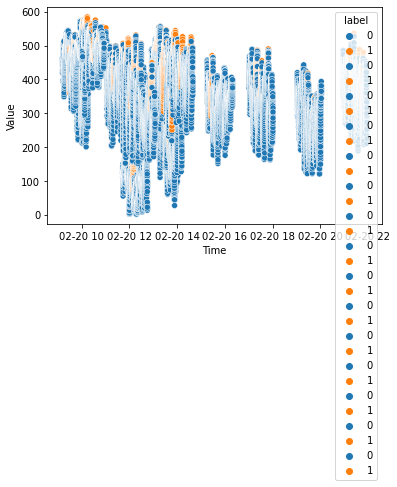

In [149]:
analys_values ('SNew')

In [150]:
dataframes_list=put_csv_to_dataframe('SNew')

In [151]:
display_13th_df(dataframes_list)

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,2022-02-20 09:55:37,559.0,NO,5.0,556.500000,556.5,3.535534,559.0,554.0
1,2022-02-20 09:55:38,567.0,NO,8.0,560.000000,559.0,6.557439,567.0,554.0
2,2022-02-20 09:55:39,566.0,NO,-1.0,561.500000,562.5,6.137318,567.0,554.0
3,2022-02-20 09:55:40,558.0,NO,-8.0,560.800000,559.0,5.540758,567.0,554.0
4,2022-02-20 09:55:41,555.0,NO,-3.0,559.833333,558.5,5.492419,567.0,554.0
...,...,...,...,...,...,...,...,...,...
3621,2022-02-20 10:56:05,505.0,NO,0.0,486.000000,490.0,14.443343,508.0,449.0
3622,2022-02-20 10:56:06,504.0,NO,-1.0,486.916667,490.0,13.785637,508.0,455.0
3623,2022-02-20 10:56:07,506.0,NO,2.0,487.750000,490.5,13.390643,508.0,455.0
3624,2022-02-20 10:56:08,506.0,NO,0.0,488.416667,491.0,13.284746,508.0,455.0


In [152]:
df1=put_list_to_df (dataframes_list)

In [153]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [154]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


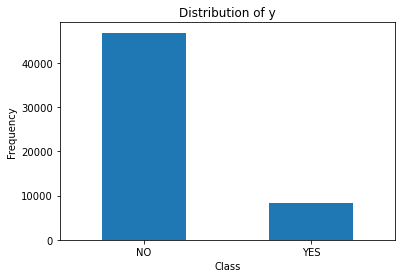

In [155]:
analys_class_imbalance(df2)

In [156]:
X=define_x(df2)

In [157]:
y=define_y(df2)

In [158]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [159]:
traintestarr=devide_training_testing(X,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [163]:
classifier=train_model_svm_rbf(X_train, y_train)

In [164]:
model_to_pickle(classifier,'svmrbfnormal')

In [165]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11630   116]
 [ 1955    91]]
Accuracy Score 0.8498404872389791
Classification report: 
              precision    recall  f1-score   support

          NO       0.86      0.99      0.92     11746
         YES       0.44      0.04      0.08      2046

    accuracy                           0.85     13792
   macro avg       0.65      0.52      0.50     13792
weighted avg       0.79      0.85      0.79     13792



# SVM classifier - linear kernel

In [166]:
remove_symbols_dupvalues ('gsrvideodata')

In [167]:
featureextraction ('gsrvideodata','SNew')

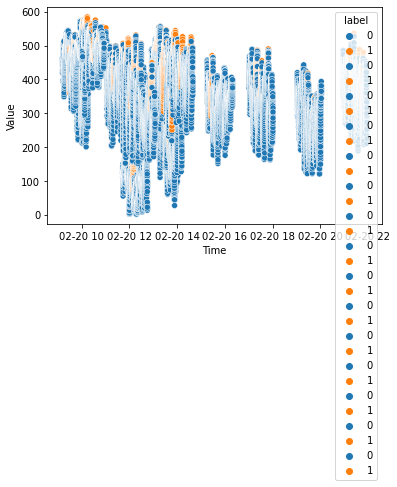

In [168]:
analys_values ('SNew')

In [169]:
dataframes_list=put_csv_to_dataframe('SNew')

In [170]:
df1=put_list_to_df (dataframes_list)

In [171]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [172]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


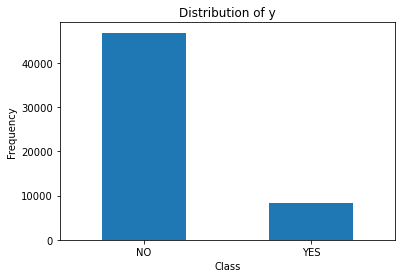

In [173]:
analys_class_imbalance(df2)

In [174]:
X=define_x(df2)

In [175]:
y=define_y(df2)

In [176]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [177]:
traintestarr=devide_training_testing(X,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [178]:
classifier=train_model_svm_linear(X_train, y_train)


In [179]:
model_to_pickle(classifier,'svmlinearnormal')

In [180]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11736    10]
 [ 2021    25]]
Accuracy Score 0.8527407192575406
Classification report: 
              precision    recall  f1-score   support

          NO       0.85      1.00      0.92     11746
         YES       0.71      0.01      0.02      2046

    accuracy                           0.85     13792
   macro avg       0.78      0.51      0.47     13792
weighted avg       0.83      0.85      0.79     13792



# Logistic Regression

In [181]:
remove_symbols_dupvalues ('gsrvideodata')

In [182]:
featureextraction ('gsrvideodata','SNew')

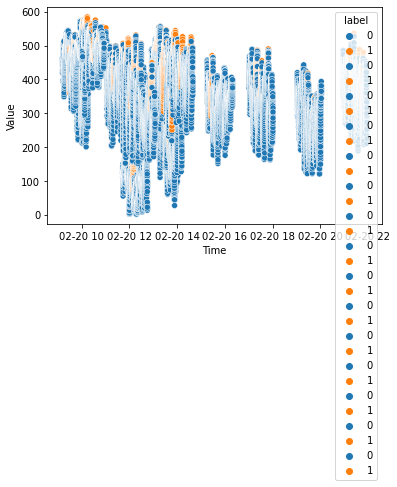

In [183]:
analys_values ('SNew')

In [184]:
dataframes_list=put_csv_to_dataframe('SNew')

In [185]:
df1=put_list_to_df (dataframes_list)

In [186]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [187]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


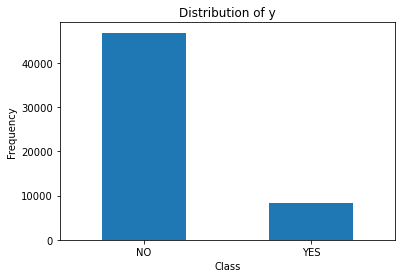

In [188]:
analys_class_imbalance(df2)

In [189]:
X=define_x(df2)

In [190]:
y=define_y(df2)

In [191]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [207]:
traintestarr=devide_training_testing(X,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [208]:
classifier=train_model_logistic_regression(X_train, y_train)

In [209]:
model_to_pickle(classifier,'logisticregressionnormal')

In [210]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11456   290]
 [ 1536   510]]
Accuracy Score 0.8676044083526682
Classification report: 
              precision    recall  f1-score   support

          NO       0.88      0.98      0.93     11746
         YES       0.64      0.25      0.36      2046

    accuracy                           0.87     13792
   macro avg       0.76      0.61      0.64     13792
weighted avg       0.85      0.87      0.84     13792



# LightGBM classifier

In [212]:
remove_symbols_dupvalues ('gsrvideodata')

In [213]:
featureextraction ('gsrvideodata','SNew')

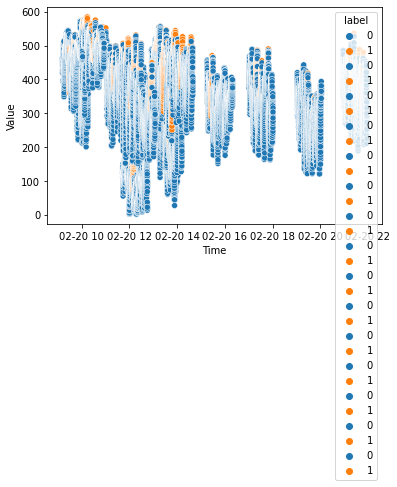

In [214]:
analys_values ('SNew')

In [215]:
dataframes_list=put_csv_to_dataframe('SNew')

In [216]:
df1=put_list_to_df (dataframes_list)

In [217]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [218]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


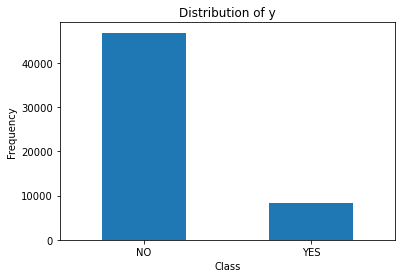

In [219]:
analys_class_imbalance(df2)

In [220]:
X=define_x(df2)

In [221]:
y=define_y(df2)

In [222]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [223]:
traintestarr=devide_training_testing(X,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [224]:
classifier=train_model_lightgbm(X_train, y_train)

In [225]:
model_to_pickle(classifier,'lightgbmnormal')

In [226]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11477   269]
 [  731  1315]]
Accuracy Score 0.9274941995359629
Classification report: 
              precision    recall  f1-score   support

          NO       0.94      0.98      0.96     11746
         YES       0.83      0.64      0.72      2046

    accuracy                           0.93     13792
   macro avg       0.89      0.81      0.84     13792
weighted avg       0.92      0.93      0.92     13792



# xgboost classifier

In [228]:
remove_symbols_dupvalues ('gsrvideodata')

In [229]:
featureextraction ('gsrvideodata','SNew')

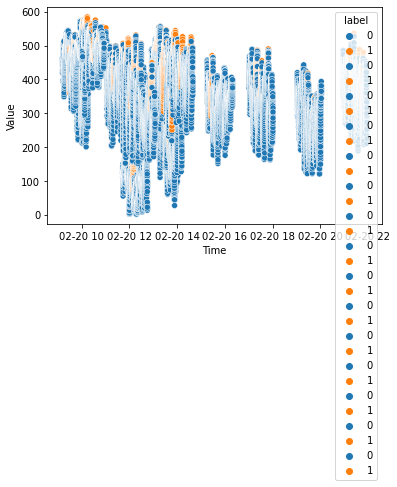

In [230]:
analys_values ('SNew')

In [231]:
dataframes_list=put_csv_to_dataframe('SNew')

In [232]:
df1=put_list_to_df (dataframes_list)

In [233]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [234]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


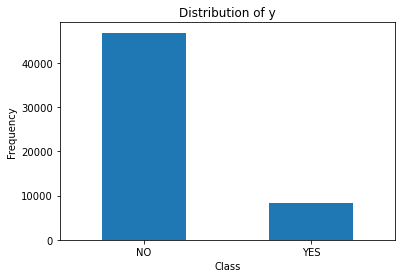

In [235]:
analys_class_imbalance(df2)

In [236]:
X=define_x(df2)

In [237]:
y=define_y(df2)

In [238]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [239]:
traintestarr=devide_training_testing(X,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [240]:
classifier=train_model_xgboost(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [241]:
model_to_pickle(classifier,'xgboostnormal')

In [242]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11516   230]
 [  495  1551]]
Accuracy Score 0.9474332946635731
Classification report: 
              precision    recall  f1-score   support

          NO       0.96      0.98      0.97     11746
         YES       0.87      0.76      0.81      2046

    accuracy                           0.95     13792
   macro avg       0.91      0.87      0.89     13792
weighted avg       0.95      0.95      0.95     13792



## ANN - Classification

In [246]:
remove_symbols_dupvalues ('gsrvideodata')

In [247]:
featureextraction ('gsrvideodata','SNew')

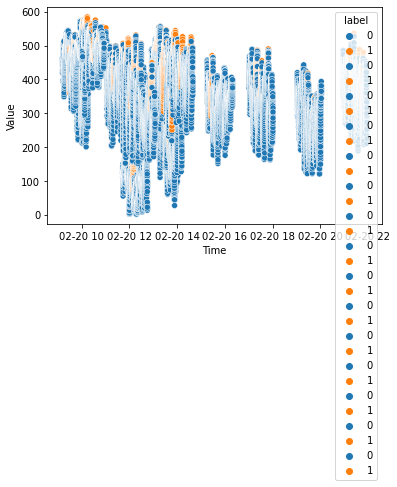

In [248]:
analys_values ('SNew')

In [249]:
dataframes_list=put_csv_to_dataframe('SNew')

In [250]:
df1=put_list_to_df (dataframes_list)

In [251]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [252]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


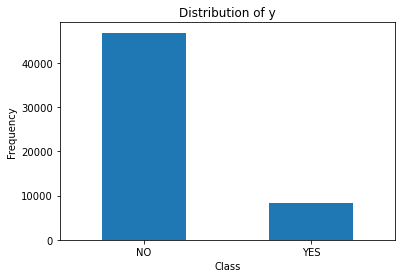

In [253]:
analys_class_imbalance(df2)

#### Importing necessary Libraries

In [254]:
import numpy as np
import pandas as pd
import tensorflow as tf

#### Generating Matrix of Features

In [255]:
X = df2.iloc[:, 2:9].values

In [256]:
X.shape
print(X)

[['NO' 2.0 350.0 ... 1.4142135623730951 351.0 349.0]
 ['NO' 0.0 350.3333333333333 ... 1.1547005383792557 351.0 349.0]
 ['NO' 1.0 350.75 ... 1.2583057392117971 352.0 349.0]
 ...
 ['NO' -2.0 263.3666666666667 ... 23.76863527001475 304.0 217.0]
 ['NO' 2.0 264.4166666666667 ... 23.840779525042915 304.0 217.0]
 ['NO' -27.0 265.3 ... 23.02194973262804 304.0 219.0]]


##### Encoding Categorical Variable Label

In [257]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,0] = np.array(LE1.fit_transform(X[:,0]))

In [258]:
print(X)

[[0 2.0 350.0 ... 1.4142135623730951 351.0 349.0]
 [0 0.0 350.3333333333333 ... 1.1547005383792557 351.0 349.0]
 [0 1.0 350.75 ... 1.2583057392117971 352.0 349.0]
 ...
 [0 -2.0 263.3666666666667 ... 23.76863527001475 304.0 217.0]
 [0 2.0 264.4166666666667 ... 23.840779525042915 304.0 217.0]
 [0 -27.0 265.3 ... 23.02194973262804 304.0 219.0]]


In [262]:
df21 = pd.DataFrame(X)
df21

,0,1,2,3,4,5,6
0,0,2.0,350.0,350.0,1.414214,351.0,349.0
1,0,0.0,350.333333,351.0,1.154701,351.0,349.0
2,0,1.0,350.75,351.0,1.258306,352.0,349.0
3,0,-23.0,346.4,351.0,9.787747,352.0,329.0
4,0,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...
55162,0,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,0,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,0,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,0,2.0,264.416667,267.5,23.84078,304.0,217.0


In [263]:
df21.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [264]:
X = df21.iloc[:, 1:7].values
y = df21.iloc[:, 0].values

In [265]:
X = np.asarray(X).astype(np.float32)

In [266]:
y = np.asarray(y).astype(np.float32)

In [267]:
print(X)
print(y)

[[  2.        350.        350.          1.4142135 351.        349.       ]
 [  0.        350.33334   351.          1.1547005 351.        349.       ]
 [  1.        350.75      351.          1.2583058 352.        349.       ]
 ...
 [ -2.        263.36667   265.5        23.768635  304.        217.       ]
 [  2.        264.41666   267.5        23.84078   304.        217.       ]
 [-27.        265.3       269.         23.02195   304.        219.       ]]
[0. 0. 0. ... 0. 0. 0.]


#### devide data into train and test

In [268]:
traintestarr=devide_training_testing(X,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
Y_train = traintestarr[2]
Y_test = traintestarr[3]

In [269]:
print(X_train)
print(X_test)

[[  5.       306.93332  299.        64.61198  397.       192.      ]
 [ -8.       486.88333  475.        31.058224 544.       438.      ]
 [ -4.       308.61667  285.5       71.0989   427.       201.      ]
 ...
 [ -1.       230.46666  234.        25.996393 280.       171.      ]
 [  5.       255.45     259.        41.621548 320.       155.      ]
 [  0.       269.26666  274.5       14.743993 291.       236.      ]]
[[  1.       424.03333  432.5       48.470844 508.       334.      ]
 [  0.       276.03333  282.        36.048916 328.       179.      ]
 [  1.       368.31668  363.        38.953033 451.       307.      ]
 ...
 [ -1.       483.75     484.         1.5      485.       482.      ]
 [  0.       364.08334  366.        20.7824   397.       317.      ]
 [ -1.       309.21667  310.        23.237967 347.       261.      ]]


#### Initialising ANN

In [270]:
ann = tf.keras.models.Sequential()

#### Adding First Hidden Layer

In [271]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#### Adding Second Hidden Layer

In [272]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#### Adding Output Layer

In [273]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#### Compiling ANN

In [274]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#### Fitting ANN

In [279]:
classifier=train_model_ann(X_train, Y_train)

Epoch 1/100
1293/1293 [==============================] - 2s 1ms/step - loss: 0.3211 - accuracy: 0.8605
Epoch 2/100
1293/1293 [==============================] - 2s 1ms/step - loss: 0.3208 - accuracy: 0.8609
Epoch 3/100
1293/1293 [==============================] - 2s 1ms/step - loss: 0.3209 - accuracy: 0.8612
Epoch 4/100
1293/1293 [==============================] - 2s 1ms/step - loss: 0.3206 - accuracy: 0.8621
Epoch 5/100
1293/1293 [==============================] - 2s 2ms/step - loss: 0.3210 - accuracy: 0.8606
Epoch 6/100
1293/1293 [==============================] - 2s 1ms/step - loss: 0.3206 - accuracy: 0.8616
Epoch 7/100
1293/1293 [==============================] - 2s 1ms/step - loss: 0.3203 - accuracy: 0.8627
Epoch 8/100
1293/1293 [==============================] - 2s 2ms/step - loss: 0.3213 - accuracy: 0.8611
Epoch 9/100
1293/1293 [==============================] - 2s 1ms/step - loss: 0.3202 - accuracy: 0.8608
Epoch 10/100
1293/1293 [==============================] - 2s 1ms/step - l

#### write to pickle

In [280]:
model_to_pickle(classifier,'annnormal')

INFO:tensorflow:Assets written to: ram://e74a41c3-bb61-4dd6-b0d1-01dd43f9a90e/assets


In [281]:
Y_pred=classifier.predict(X_test)
print(Y_pred)

[[0.04229778]
 [0.04229778]
 [0.04229778]
 ...
 [0.64496946]
 [0.08623263]
 [0.0652464 ]]


# Randomforest classifier

In [283]:
remove_symbols_dupvalues ('gsrvideodata')

In [284]:
featureextraction ('gsrvideodata','SNew')

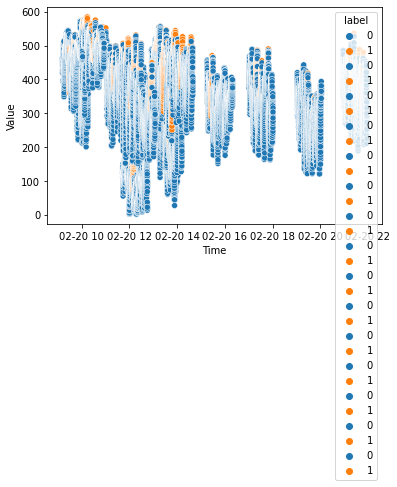

In [285]:
analys_values ('SNew')

In [286]:
dataframes_list=put_csv_to_dataframe('SNew')

In [287]:
df1=put_list_to_df (dataframes_list)

In [288]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [289]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


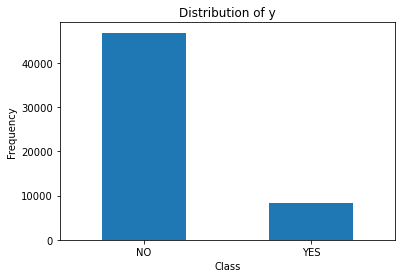

In [290]:
analys_class_imbalance(df2)

In [291]:
X=define_x(df2)

In [292]:
y=define_y(df2)

In [293]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [294]:
traintestarr=devide_training_testing(X,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [295]:
classifier=train_model_randomforest(X_train, y_train)

In [296]:
model_to_pickle(classifier,'randomforestnormal')

In [297]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11623   123]
 [  315  1731]]
Accuracy Score 0.9682424593967517
Classification report: 
              precision    recall  f1-score   support

          NO       0.97      0.99      0.98     11746
         YES       0.93      0.85      0.89      2046

    accuracy                           0.97     13792
   macro avg       0.95      0.92      0.93     13792
weighted avg       0.97      0.97      0.97     13792



## Randomforest classifier

### without extra features with normalization

In [300]:
remove_symbols_dupvalues ('gsrvideodata')

In [301]:
featureextraction ('gsrvideodata','SNew')

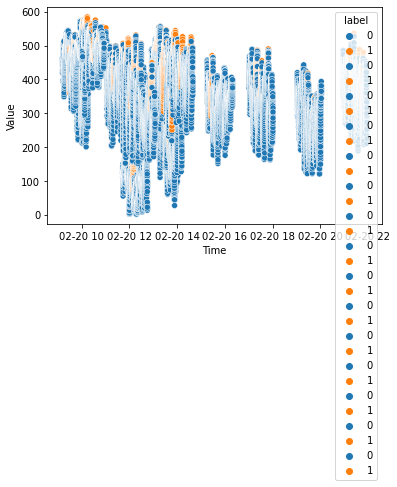

In [302]:
analys_values ('SNew')

In [303]:
dataframes_list=put_csv_to_dataframe('SNew')

In [304]:
df1=put_list_to_df (dataframes_list)

In [305]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [306]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


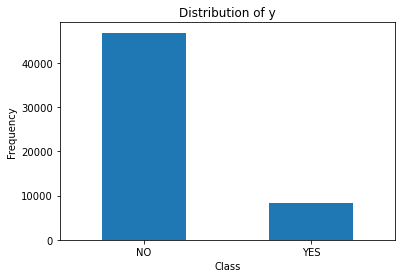

In [307]:
analys_class_imbalance(df2)

In [308]:
X=define_x(df2)

In [309]:
y=define_y(df2)

In [310]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [311]:
X_norm=normalization(X)

In [312]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [315]:
classifier=train_model_rf_normalization(X_train, y_train)

In [316]:
model_to_pickle(classifier,'rfnormalization')

In [317]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11625   121]
 [  330  1716]]
Accuracy Score 0.9672998839907193
Classification report: 
              precision    recall  f1-score   support

          NO       0.97      0.99      0.98     11746
         YES       0.93      0.84      0.88      2046

    accuracy                           0.97     13792
   macro avg       0.95      0.91      0.93     13792
weighted avg       0.97      0.97      0.97     13792



### SMOTE


In [33]:
from typing import Counter
# import library
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('After',counter)
##print('Original dataset shape', Counter(y))
##print('Resample dataset shape', Counter(y_ros))

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/


### SMOTE ENN

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [35]:
from typing import Counter
# import library
from imblearn.combine import SMOTEENN
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()

# fit predictor and target variable
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)
counter = Counter(y_train_smenn)
print('After',counter)
##print('Original dataset shape', Counter(y))
##print('Resample dataset shape', Counter(y_ros))

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'YES': 34339, 'NO': 31511})


## Hyper Parameter Optimization without extra features

### Randomized Search Cv

### with smote ENN

#### Max_depth [10, 1000,10]

In [36]:
remove_symbols_dupvalues ('gsrvideodata')

In [37]:
featureextraction ('gsrvideodata','SNew')

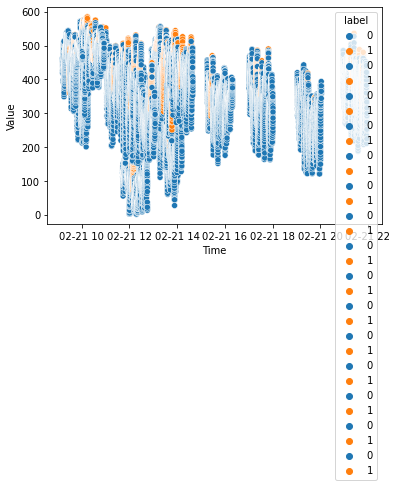

In [38]:
analys_values ('SNew')

In [39]:
dataframes_list=put_csv_to_dataframe('SNew')

In [40]:
df1=put_list_to_df (dataframes_list)

In [41]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [42]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


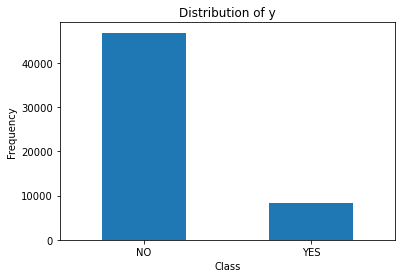

In [43]:
analys_class_imbalance(df2)

In [44]:
X=define_x(df2)

In [45]:
y=define_y(df2)

In [46]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [47]:
X_norm=normalization(X)

In [48]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [49]:
smoteenn_train_arr = smote_enn(X_train, y_train)
X_train_smenn = smoteenn_train_arr[0]
y_train_smenn = smoteenn_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'YES': 34348, 'NO': 31490})


In [50]:
depth_arr = [10,1000,10]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 1000, 10], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [55]:
rf_randomcv = train_model_rf_Normalization_sampling_woscoring(random_grid,X_train_smenn,y_train_smenn)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [56]:
model_to_pickle(rf_randomcv,'rfnormalization_smenn_E1_woextra_f')

In [57]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 1000, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [58]:
best_random_grid=rf_randomcv.best_estimator_

In [59]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=1000, n_estimators=1000)

In [60]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_depth': 1000,
 'criterion': 'entropy'}

In [62]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11107   639]
 [  145  1901]]
Accuracy Score 0.9431554524361949
Classification report: 
              precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.93      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



#### Max_depth [10,340,10]

Randomized Search Cv

In [66]:
remove_symbols_dupvalues ('gsrvideodata')

In [67]:
featureextraction ('gsrvideodata','SNew')

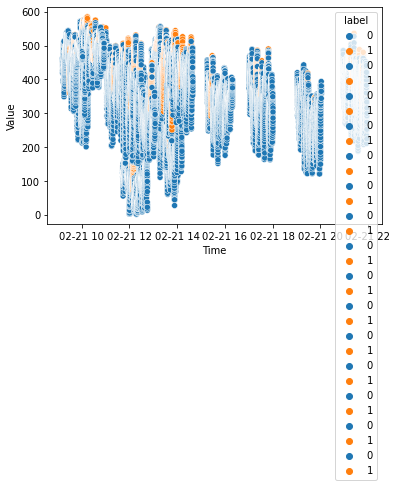

In [68]:
analys_values ('SNew')

In [69]:
dataframes_list=put_csv_to_dataframe('SNew')

In [70]:
df1=put_list_to_df (dataframes_list)

In [71]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [72]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


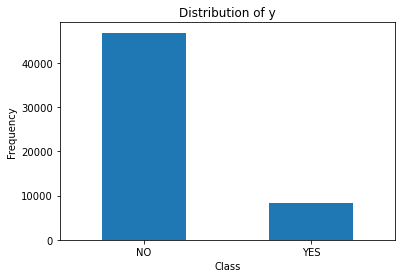

In [73]:
analys_class_imbalance(df2)

In [74]:
X=define_x(df2)

In [75]:
y=define_y(df2)

In [76]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [77]:
X_norm=normalization(X)

In [78]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]


In [79]:
smoteenn_train_arr = smote_enn(X_train, y_train)
X_train_smenn = smoteenn_train_arr[0]
y_train_smenn = smoteenn_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'YES': 34351, 'NO': 31499})


In [80]:
depth_arr = [10,340,10]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 340, 10], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [81]:
rf_randomcv = train_model_rf_Normalization_sampling_wscoring(random_grid,X_train_smenn,y_train_smenn)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [82]:
model_to_pickle(rf_randomcv,'rfnormalization_smenn_E2_woextra_f')

In [83]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 340, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [84]:
best_random_grid=rf_randomcv.best_estimator_

In [85]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=340, n_estimators=600)

In [86]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_depth': 340,
 'criterion': 'entropy'}

In [87]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11115   631]
 [  160  1886]]
Accuracy Score 0.9426479118329466
Classification report: 
              precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.92      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.93      0.90     13792
weighted avg       0.95      0.94      0.95     13792



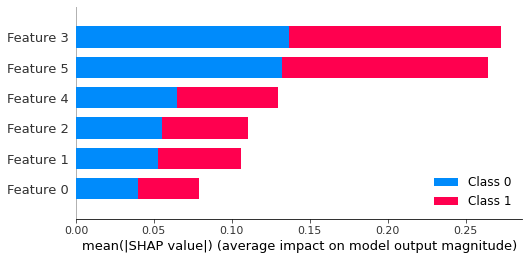

In [60]:
import shap
explainer = shap.TreeExplainer(best_random_grid1)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

#### max_depth = [2, 4, 10, 20, 50]

In [88]:
remove_symbols_dupvalues ('gsrvideodata')

In [89]:
featureextraction ('gsrvideodata','SNew')

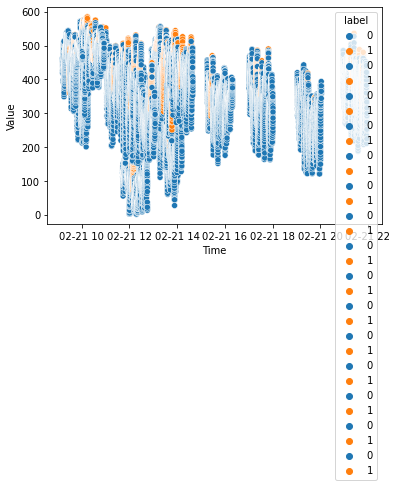

In [90]:
analys_values ('SNew')

In [91]:
dataframes_list=put_csv_to_dataframe('SNew')

In [92]:
df1=put_list_to_df (dataframes_list)

In [93]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [94]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


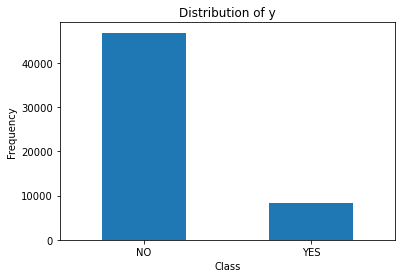

In [95]:
analys_class_imbalance(df2)

In [96]:
X=define_x(df2)

In [97]:
y=define_y(df2)

In [98]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [99]:
X_norm=normalization(X)

In [100]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [101]:
smoteenn_train_arr = smote_enn(X_train, y_train)
X_train_smenn = smoteenn_train_arr[0]
y_train_smenn = smoteenn_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'YES': 34383, 'NO': 31490})


In [102]:
depth_arr = [2, 4, 10, 20, 50]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [2, 4, 10, 20, 50], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [103]:
rf_randomcv = train_model_rf_Normalization_sampling_wscoring(random_grid,X_train_smenn,y_train_smenn)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [104]:
model_to_pickle(rf_randomcv,'rfnormalization_smenn_E3_woextra_f')

In [105]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [106]:
best_random_grid=rf_randomcv.best_estimator_

In [107]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=800)

In [108]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_depth': 50,
 'criterion': 'entropy'}

In [109]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11120   626]
 [  141  1905]]
Accuracy Score 0.9443880510440835
Classification report: 
              precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.93      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

### with smote

#### Max_depth [10, 1000,10]

In [112]:
remove_symbols_dupvalues ('gsrvideodata')

In [113]:
featureextraction ('gsrvideodata','SNew')

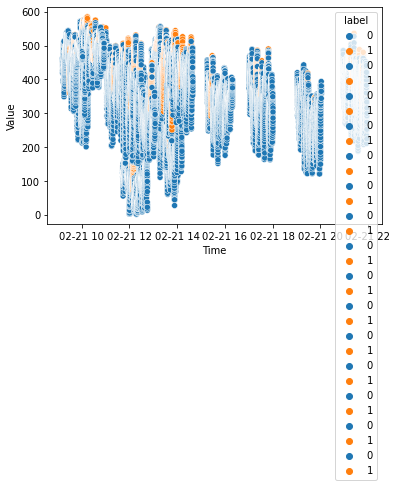

In [114]:
analys_values ('SNew')

In [115]:
dataframes_list=put_csv_to_dataframe('SNew')

In [116]:
df1=put_list_to_df (dataframes_list)

In [117]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [118]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


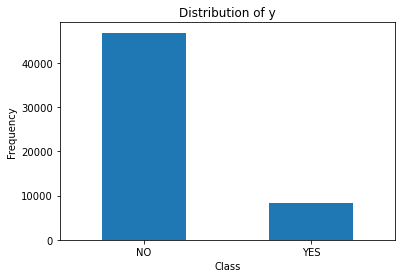

In [119]:
analys_class_imbalance(df2)

In [120]:
X=define_x(df2)

In [121]:
y=define_y(df2)

In [122]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [123]:
X_norm=normalization(X)

In [124]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [125]:
smote_train_arr = smote(X_train, y_train)
X_train_sm = smote_train_arr[0]
y_train_sm = smote_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


In [126]:
depth_arr = [10,1000,10]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 1000, 10], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [127]:
rf_randomcv = train_model_rf_Normalization_sampling_woscoring(random_grid,X_train_sm,y_train_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [128]:
model_to_pickle(rf_randomcv,'rfnormalization_sm_E1_woextra_f')

In [129]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 1000, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [130]:
best_random_grid=rf_randomcv.best_estimator_

In [131]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=1000, n_estimators=600)

In [132]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_depth': 1000,
 'criterion': 'entropy'}

In [133]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11514   232]
 [  200  1846]]
Accuracy Score 0.968677494199536
Classification report: 
              precision    recall  f1-score   support

          NO       0.98      0.98      0.98     11746
         YES       0.89      0.90      0.90      2046

    accuracy                           0.97     13792
   macro avg       0.94      0.94      0.94     13792
weighted avg       0.97      0.97      0.97     13792



#### Max_depth [10,340,10]

In [136]:
remove_symbols_dupvalues ('gsrvideodata')

In [137]:
featureextraction ('gsrvideodata','SNew')

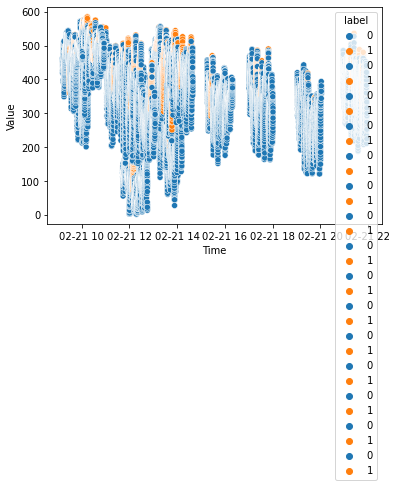

In [138]:
analys_values ('SNew')

In [139]:
dataframes_list=put_csv_to_dataframe('SNew')

In [140]:
df1=put_list_to_df (dataframes_list)

In [141]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [142]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


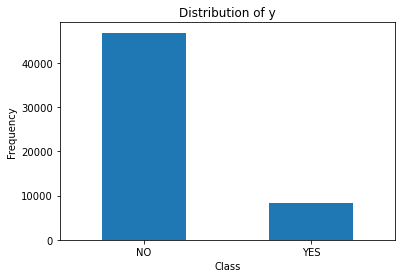

In [143]:
analys_class_imbalance(df2)

In [144]:
X=define_x(df2)

In [145]:
y=define_y(df2)

In [146]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [147]:
X_norm=normalization(X)

In [148]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [149]:
smote_train_arr = smote(X_train, y_train)
X_train_sm = smote_train_arr[0]
y_train_sm = smote_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


In [150]:
depth_arr = [10,340,10]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 340, 10], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [151]:
rf_randomcv = train_model_rf_Normalization_sampling_wscoring(random_grid,X_train_sm,y_train_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [152]:
model_to_pickle(rf_randomcv,'rfnormalization_sm_E2_woextra_f')

In [153]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 340, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [154]:
best_random_grid=rf_randomcv.best_estimator_

In [155]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=340, n_estimators=1000)

In [156]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_depth': 340,
 'criterion': 'entropy'}

In [157]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11508   238]
 [  202  1844]]
Accuracy Score 0.9680974477958236
Classification report: 
              precision    recall  f1-score   support

          NO       0.98      0.98      0.98     11746
         YES       0.89      0.90      0.89      2046

    accuracy                           0.97     13792
   macro avg       0.93      0.94      0.94     13792
weighted avg       0.97      0.97      0.97     13792



#### max_depth = [2, 4, 10, 20, 50]

In [159]:
remove_symbols_dupvalues ('gsrvideodata')

In [160]:
featureextraction ('gsrvideodata','SNew')

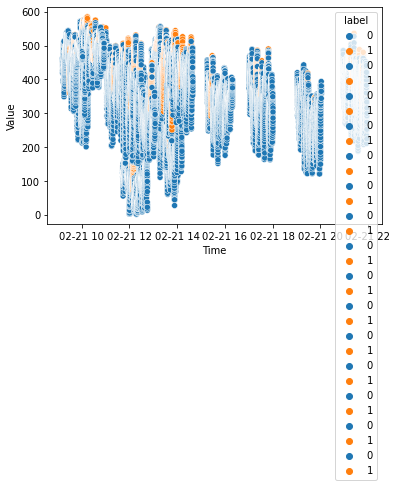

In [161]:
analys_values ('SNew')

In [162]:
dataframes_list=put_csv_to_dataframe('SNew')

In [163]:
df1=put_list_to_df (dataframes_list)

In [164]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [165]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


NO: 84.79163267895662 %
YES: 15.208367321043378 %


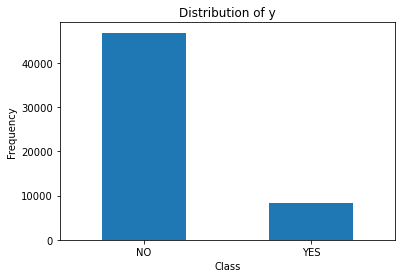

In [166]:
analys_class_imbalance(df2)

In [167]:
X=define_x(df2)

In [168]:
y=define_y(df2)

In [169]:
x_y_info(X,y)

X.shape
(55167, 6)
y.shape
(55167,)
X
[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [170]:
X_norm=normalization(X)

In [171]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [172]:
smote_train_arr = smote(X_train, y_train)
X_train_sm = smote_train_arr[0]
y_train_sm = smote_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


In [173]:
depth_arr = [2, 4, 10, 20, 50]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [2, 4, 10, 20, 50], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [174]:
rf_randomcv = train_model_rf_Normalization_sampling_wscoring(random_grid,X_train_sm,y_train_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [176]:
model_to_pickle(rf_randomcv,'rfnormalization_sm_E3_woextra_f')

In [177]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [178]:
best_random_grid=rf_randomcv.best_estimator_

In [179]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=800)

In [180]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_depth': 50,
 'criterion': 'entropy'}

In [181]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11510   236]
 [  213  1833]]
Accuracy Score 0.9674448955916474
Classification report: 
              precision    recall  f1-score   support

          NO       0.98      0.98      0.98     11746
         YES       0.89      0.90      0.89      2046

    accuracy                           0.97     13792
   macro avg       0.93      0.94      0.94     13792
weighted avg       0.97      0.97      0.97     13792



## Train with optimized model without extra features

#### Max_depth [10, 1000,10] with smote

In [34]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
##max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               ##'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               ##'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf_randomcvws=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
rf_randomcvws.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [36]:
rf_randomcvws.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'max_depth': 780,
 'criterion': 'entropy'}

In [37]:
rf_randomcvws

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [38]:
best_random_gridws=rf_randomcvws.best_estimator_


In [39]:
best_random_gridws

RandomForestClassifier(criterion='entropy', max_depth=780, n_estimators=400)

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_pred=best_random_gridws.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11516   230]
 [  212  1834]]
Accuracy Score 0.9679524361948956
Classification report:               precision    recall  f1-score   support

          NO       0.98      0.98      0.98     11746
         YES       0.89      0.90      0.89      2046

    accuracy                           0.97     13792
   macro avg       0.94      0.94      0.94     13792
weighted avg       0.97      0.97      0.97     13792



In [42]:
import pickle
pickle.dump(rf_randomcvws, open('modelsvrandomforest.pkl', 'wb'))


## predict test data without extra features

In [43]:
import pandas as pd

from dateutil.parser import parse

In [44]:
    newlevel = ','
    stocklevel = ' --> '
    s = open("gsrvideodatatest1.csv").read()
    s = s.replace (stocklevel ,newlevel) #be careful - will currently replace any number in the file matching stock level!
    f = open("gsrvideodatatest1.csv", 'w')
    f.write(s)
    f.close()
    col_Names=["Time", "Value","","label"]
    df = pd.read_csv("gsrvideodatatest1.csv",names=col_Names)
    q=df['Time'].min()
    df = df.drop(df.index[df['Time'] == q])
    df.to_csv("gsrvideodatatest1.csv", index = False,header=False)

In [45]:
for i in range(1):
    #define column names
    col_Names=["Time", "Value","","label"]
    dataframe = pd.read_csv("gsrvideodatatest"+str(i+1)+".csv",parse_dates=['Time'],names=col_Names)

    dataframe.dtypes

    dataframe['Time'] = pd.to_datetime(dataframe['Time'], infer_datetime_format = True)


    dataframe.dtypes

    #set time as index
    indexed_dataset = dataframe.set_index(['Time'])

    indexed_dataset.index.inferred_type == "datetime64"

    indexed_dataset.dtypes

    indexed_dataset.head()

    #remove non value row
    indexed_dataset = indexed_dataset.iloc[:-1 , :]

    #remove NAN column
    indexed_dataset = indexed_dataset.dropna(axis=1)


    indexed_dataset

    indexed_dataset.dtypes

    indexed_dataset.index.inferred_type == "datetime64"
    
    #define value as float
    indexed_dataset['Value'] = indexed_dataset['Value'].astype(float)


    indexed_dataset.dtypes


    #get dropvalue feature
    indexed_dataset['dropValue'] = indexed_dataset['Value'].diff()
    
    #get rollmean feature
    indexed_dataset['rollmean'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).mean()
    
    #get rollmedian feature
    indexed_dataset['rollmedian'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).median()
    
    #get rollstd feature
    indexed_dataset['rollstd'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).std()
    
    #get rollmax feature
    indexed_dataset['rollMax'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).max()
    
    #get rollmin feature
    indexed_dataset['rollMin'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).min()

    indexed_dataset
    
    #remove non value rows
    indexed_dataset = indexed_dataset.iloc[1: , :]


    indexed_dataset

    #write to csv files
    indexed_dataset.to_csv("SNewtest"+str(i+1)+".csv", index = True)

In [46]:
import pandas as pd

dataframes_list = []

for i in range(1):

    df=pd.read_csv("SNewtest"+str(i+1)+".csv")
    dataframes_list.append(df)

In [47]:
df1=pd.concat(dataframes_list)

In [48]:
df1['Time'] = pd.to_datetime(df1['Time'], infer_datetime_format = True)


In [49]:
df1['Time']=df1['Time'].dt.time 
df2=df1

In [50]:
df2.index = range(len(df2))

In [51]:
df2

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,09:46:39,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,09:46:40,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
2,09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
3,09:46:42,531.0,NO,1.0,530.200000,530.0,0.447214,531.0,530.0
4,09:46:43,533.0,NO,2.0,530.666667,530.0,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3721,10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3722,10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3723,10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3724,10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [52]:
df2.shape

(3726, 9)

In [53]:
df2.dtypes

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [54]:
time1 = df2.loc[0,'Time']
print(time1)

09:46:39


In [55]:
df3=df2

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        3726 non-null   object 
 1   Value       3726 non-null   float64
 2   label       3726 non-null   object 
 3   dropValue   3726 non-null   float64
 4   rollmean    3726 non-null   float64
 5   rollmedian  3726 non-null   float64
 6   rollstd     3726 non-null   float64
 7   rollMax     3726 non-null   float64
 8   rollMin     3726 non-null   float64
dtypes: float64(7), object(2)
memory usage: 262.1+ KB


In [57]:
df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S')

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        3726 non-null   datetime64[ns]
 1   Value       3726 non-null   float64       
 2   label       3726 non-null   object        
 3   dropValue   3726 non-null   float64       
 4   rollmean    3726 non-null   float64       
 5   rollmedian  3726 non-null   float64       
 6   rollstd     3726 non-null   float64       
 7   rollMax     3726 non-null   float64       
 8   rollMin     3726 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 262.1+ KB


In [59]:
df3

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,1900-01-01 09:46:39,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,1900-01-01 09:46:40,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
2,1900-01-01 09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
3,1900-01-01 09:46:42,531.0,NO,1.0,530.200000,530.0,0.447214,531.0,530.0
4,1900-01-01 09:46:43,533.0,NO,2.0,530.666667,530.0,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3721,1900-01-01 10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3722,1900-01-01 10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3723,1900-01-01 10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3724,1900-01-01 10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [60]:
from datetime import timedelta

In [61]:
df3.index

RangeIndex(start=0, stop=3726, step=1)

In [62]:
time1 = df3.loc[0,'Time']
pickled_model = pickle.load(open('modelsvrandomforest.pkl', 'rb'))
X_testactualall = df3.iloc[:, 3:9].values

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
normg = MinMaxScaler().fit(X_testactualall)
# transform training data
X_normg = normg.transform(X_testactualall)

arrall=pickled_model.predict(X_normg)
print(arrall)  
    


['YES' 'YES' 'YES' ... 'NO' 'NO' 'NO']


In [63]:
time1 = df3.loc[0,'Time']
pickled_model = pickle.load(open('modelsvrandomforest.pkl', 'rb'))
#X_testactualall = df3.iloc[:, 3:9].values
#arrall=pickled_model.predict(X_testactualall)
#print(arrall)

rows=0
while ((rows+120)<len(df3.index)):
  type(time1)
  end_time = time1 + timedelta(minutes = 2)
  end_time
  iArray=df3.index[df3['Time']==end_time].tolist()
  rows=iArray[0]
  df4=df3.loc[(df3['Time'] >= time1) & (df3['Time'] <= end_time)]
  df4
  X_testactual = df4.iloc[:, 3:9].values
  X_testactual
  # data normalization with sklearn
  from sklearn.preprocessing import MinMaxScaler
  # fit scaler on training data
  norm = MinMaxScaler().fit(X_testactual)
  # transform training data
  X_norm = norm.transform(X_testactual)
  arr=pickled_model.predict(X_norm)
  arr
  cot=0
  for tag in arr:
      if(tag=='YES'):
          cot=cot+1
  percentage=cot/len(arr)*100
  print(str(percentage)+"%")
  time1=end_time

9.090909090909092%
6.6115702479338845%
9.166666666666666%
33.057851239669425%
3.3057851239669422%
8.264462809917356%
0.0%
5.833333333333333%
8.264462809917356%
0.0%
0.8264462809917356%
14.049586776859504%
10.833333333333334%
3.3057851239669422%
10.743801652892563%
10.743801652892563%
9.917355371900827%
7.5%
11.570247933884298%
16.528925619834713%
12.396694214876034%
0.0%
2.479338842975207%
2.479338842975207%
3.3057851239669422%
61.15702479338842%
1.6666666666666667%
0.0%
19.834710743801654%
3.3057851239669422%
0.0%


In [64]:
yactual = df3.iloc[:, 2].values

In [65]:
print(yactual)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [66]:
print(arrall)

['YES' 'YES' 'YES' ... 'NO' 'NO' 'NO']


In [ ]:
import pandas as pd
import seaborn as sns
for i in range(15):

    df=pd.read_csv("SNew"+str(i+1)+".csv")
    df.label.replace(('YES', 'NO'), (1, 0), inplace=True)
    df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
    sns.scatterplot(data=df, x='Time', y='Value', hue='label')

Text(0, 0.5, 'Frequency')

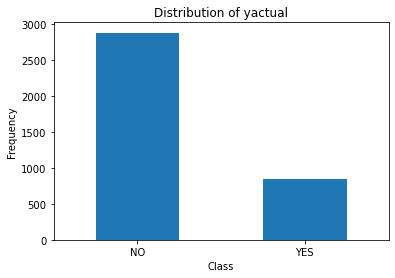

In [67]:
count_classes = pd.value_counts(yactual, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution of yactual")

plt.xlabel("Class")

plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

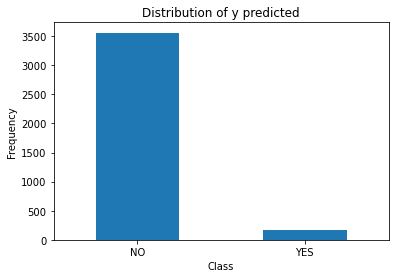

In [68]:
count_classes = pd.value_counts(arrall, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution of y predicted")

plt.xlabel("Class")

plt.ylabel("Frequency")

## Randomforest classifier

### with extra features

In [203]:
remove_symbols_dupvalues ('gsrvideodata')

In [204]:
featureextraction ('gsrvideodata','SNew')

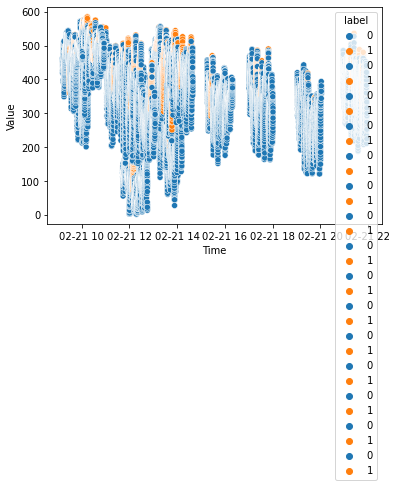

In [205]:
analys_values ('SNew')

In [206]:
dataframes_list=put_csv_to_dataframe('SNew')

In [207]:
df1=put_list_to_df (dataframes_list)

In [208]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [209]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


In [210]:
df4=df2

In [211]:
df4=new_feature_creation(df4)

In [212]:
df4

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin,meanplusmedian,...,meanmulmedian,maxmulmin,meanmulmax,meanmulmin,medianmulmax,medianmulmin,medianmulmean,medianmulmeanmulstd,meanmulmaxmulmin,medianmulmaxmulmin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0,700.000000,...,122500.000000,122499.0,122850.000000,122150.000000,122850.0,122150.0,122500.000000,1.732412e+05,4.287465e+07,42874650.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0,701.333333,...,122967.000000,122499.0,122967.000000,122266.333333,123201.0,122499.0,122967.000000,1.419901e+05,4.291548e+07,42997149.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0,701.750000,...,123113.250000,122848.0,123464.000000,122411.750000,123552.0,122499.0,123113.250000,1.549141e+05,4.308894e+07,43119648.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0,697.400000,...,121586.400000,115808.0,121932.800000,113965.600000,123552.0,115479.0,121586.400000,1.190057e+06,4.011589e+07,40648608.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0,693.333333,...,120166.666667,115456.0,120853.333333,112613.333333,123200.0,114800.0,120166.666667,1.386177e+06,3.963989e+07,40409600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0,524.416667,...,68753.125000,65968.0,79622.666667,56835.916667,79800.0,56962.5,68753.125000,1.583944e+06,1.727812e+07,17316600.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0,526.183333,...,69217.058333,65968.0,79855.733333,57002.283333,80104.0,57179.5,69217.058333,1.621807e+06,1.732869e+07,17382568.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0,528.866667,...,69923.850000,65968.0,80063.466667,57150.566667,80712.0,57613.5,69923.850000,1.661994e+06,1.737377e+07,17514504.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0,531.916667,...,70731.458333,65968.0,80382.666667,57378.416667,81320.0,58047.5,70731.458333,1.686293e+06,1.744304e+07,17646440.0


In [213]:
X = define_x_wextra_f(df4)
y = define_y_wextra_f(df4)
x_y_info(X,y)

X.shape
(55167, 27)
y.shape
(55167,)
X
[[ 2.00000000e+00  3.50000000e+02  3.50000000e+02 ...  1.73241161e+05
   4.28746500e+07  4.28746500e+07]
 [ 0.00000000e+00  3.50333333e+02  3.51000000e+02 ...  1.41990061e+05
   4.29154830e+07  4.29971490e+07]
 [ 1.00000000e+00  3.50750000e+02  3.51000000e+02 ...  1.54914109e+05
   4.30889360e+07  4.31196480e+07]
 ...
 [-2.00000000e+00  2.63366667e+02  2.65500000e+02 ...  1.66199449e+06
   1.73737723e+07  1.75145040e+07]
 [ 2.00000000e+00  2.64416667e+02  2.67500000e+02 ...  1.68629310e+06
   1.74430387e+07  1.76464400e+07]
 [-2.70000000e+01  2.65300000e+02  2.69000000e+02 ...  1.64297756e+06
   1.76626128e+07  1.79089440e+07]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [214]:
X_norm=normalization(X)

In [215]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [216]:
print(X_train)

[[0.55963303 0.51435984 0.5        ... 0.26937099 0.12322145 0.11987568]
 [0.5        0.84008085 0.81768953 ... 0.32630047 0.61113751 0.59542701]
 [0.51834862 0.51740678 0.47563177 ... 0.28458431 0.13951055 0.12888619]
 ...
 [0.53211009 0.37595028 0.38267148 ... 0.0636883  0.05810128 0.05891375]
 [0.55963303 0.42117171 0.42779783 ... 0.12509688 0.06671786 0.06755519]
 [0.53669725 0.44618077 0.45577617 ... 0.04950654 0.09738858 0.0991496 ]]


In [217]:
smote_train_arr = smote(X_train, y_train)
X_train_sm = smote_train_arr[0]
y_train_sm = smote_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


In [218]:
classifier = train_model_rf_normalization(X_train_sm, y_train_sm)

In [219]:
model_to_pickle(classifier,'rfnormalization_wextra_f')

In [220]:
prediction_and_accuracy(X_test,y_test,classifier)

[[11492   254]
 [  174  1872]]
Accuracy Score 0.9689675174013921
Classification report: 
              precision    recall  f1-score   support

          NO       0.99      0.98      0.98     11746
         YES       0.88      0.91      0.90      2046

    accuracy                           0.97     13792
   macro avg       0.93      0.95      0.94     13792
weighted avg       0.97      0.97      0.97     13792



### Use shap for feature importance

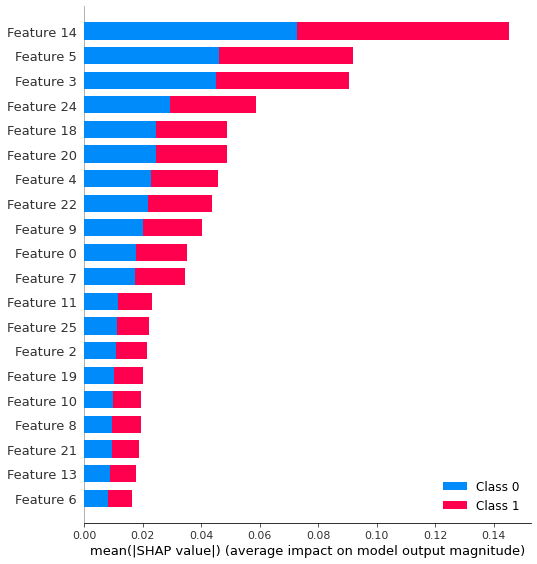

In [39]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

## optimize using depths with extra features

### with smote

#### Max_depth [10, 1000,10]

In [122]:
remove_symbols_dupvalues ('gsrvideodata')

In [123]:
featureextraction ('gsrvideodata','SNew')

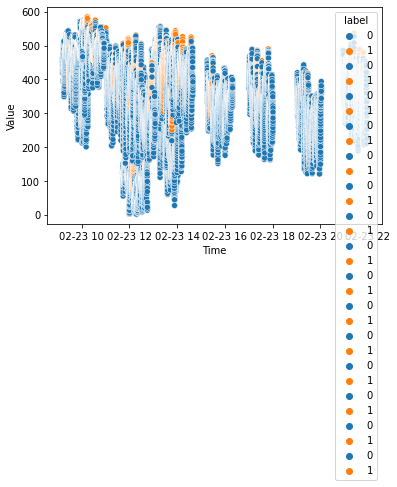

In [124]:
analys_values ('SNew')

In [125]:
dataframes_list=put_csv_to_dataframe('SNew')

In [126]:
df1=put_list_to_df (dataframes_list)

In [127]:
df1=datetime_to_obj(df1)

df2=reset_index(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


In [128]:
df4=df2

df4=new_feature_creation(df4)

df4

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin,meanplusmedian,...,meanmulmedian,maxmulmin,meanmulmax,meanmulmin,medianmulmax,medianmulmin,medianmulmean,medianmulmeanmulstd,meanmulmaxmulmin,medianmulmaxmulmin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0,700.000000,...,122500.000000,122499.0,122850.000000,122150.000000,122850.0,122150.0,122500.000000,1.732412e+05,4.287465e+07,42874650.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0,701.333333,...,122967.000000,122499.0,122967.000000,122266.333333,123201.0,122499.0,122967.000000,1.419901e+05,4.291548e+07,42997149.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0,701.750000,...,123113.250000,122848.0,123464.000000,122411.750000,123552.0,122499.0,123113.250000,1.549141e+05,4.308894e+07,43119648.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0,697.400000,...,121586.400000,115808.0,121932.800000,113965.600000,123552.0,115479.0,121586.400000,1.190057e+06,4.011589e+07,40648608.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0,693.333333,...,120166.666667,115456.0,120853.333333,112613.333333,123200.0,114800.0,120166.666667,1.386177e+06,3.963989e+07,40409600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0,524.416667,...,68753.125000,65968.0,79622.666667,56835.916667,79800.0,56962.5,68753.125000,1.583944e+06,1.727812e+07,17316600.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0,526.183333,...,69217.058333,65968.0,79855.733333,57002.283333,80104.0,57179.5,69217.058333,1.621807e+06,1.732869e+07,17382568.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0,528.866667,...,69923.850000,65968.0,80063.466667,57150.566667,80712.0,57613.5,69923.850000,1.661994e+06,1.737377e+07,17514504.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0,531.916667,...,70731.458333,65968.0,80382.666667,57378.416667,81320.0,58047.5,70731.458333,1.686293e+06,1.744304e+07,17646440.0


In [143]:
X = define_x_wextra_f(df4)
y = define_y_wextra_f(df4)
x_y_info(X,y)

X.shape
(55167, 27)
y.shape
(55167,)
X
[[ 2.00000000e+00  3.50000000e+02  3.50000000e+02 ...  1.73241161e+05
   4.28746500e+07  4.28746500e+07]
 [ 0.00000000e+00  3.50333333e+02  3.51000000e+02 ...  1.41990061e+05
   4.29154830e+07  4.29971490e+07]
 [ 1.00000000e+00  3.50750000e+02  3.51000000e+02 ...  1.54914109e+05
   4.30889360e+07  4.31196480e+07]
 ...
 [-2.00000000e+00  2.63366667e+02  2.65500000e+02 ...  1.66199449e+06
   1.73737723e+07  1.75145040e+07]
 [ 2.00000000e+00  2.64416667e+02  2.67500000e+02 ...  1.68629310e+06
   1.74430387e+07  1.76464400e+07]
 [-2.70000000e+01  2.65300000e+02  2.69000000e+02 ...  1.64297756e+06
   1.76626128e+07  1.79089440e+07]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [229]:
X_norm=normalization(X)

In [230]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [231]:
print(X_train)

[[0.55963303 0.51435984 0.5        ... 0.26937099 0.12322145 0.11987568]
 [0.5        0.84008085 0.81768953 ... 0.32630047 0.61113751 0.59542701]
 [0.51834862 0.51740678 0.47563177 ... 0.28458431 0.13951055 0.12888619]
 ...
 [0.53211009 0.37595028 0.38267148 ... 0.0636883  0.05810128 0.05891375]
 [0.55963303 0.42117171 0.42779783 ... 0.12509688 0.06671786 0.06755519]
 [0.53669725 0.44618077 0.45577617 ... 0.04950654 0.09738858 0.0991496 ]]


In [232]:
smote_train_arr = smote(X_train, y_train)
X_train_sm = smote_train_arr[0]
y_train_sm = smote_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


In [233]:
depth_arr = [10,1000,10]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 1000, 10], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [234]:
rf_randomcv = train_model_rf_Normalization_sampling_woscoring(random_grid,X_train_sm,y_train_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [235]:
model_to_pickle(rf_randomcv,'rfnormalization_sm_E1_wextra_f')

In [236]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 1000, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [237]:
best_random_grid=rf_randomcv.best_estimator_

In [238]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=1000, n_estimators=600)

In [239]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_depth': 1000,
 'criterion': 'entropy'}

In [240]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11492   254]
 [  159  1887]]
Accuracy Score 0.9700551044083526
Classification report: 
              precision    recall  f1-score   support

          NO       0.99      0.98      0.98     11746
         YES       0.88      0.92      0.90      2046

    accuracy                           0.97     13792
   macro avg       0.93      0.95      0.94     13792
weighted avg       0.97      0.97      0.97     13792



# Experiments--------------------------------------------------------------------------------------

###### y_test_prediction visualization

In [144]:
    import pandas as pd
    df = df4.iloc[:, 0:32].values
    arr_split = devide_training_testing(df,y)
    test_set = arr_split[1]
    dff=pd.DataFrame(test_set)
    dff

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,14:02:52,449.0,NO,1.0,424.033333,432.5,48.470843,508.0,334.0,856.533333,...,183394.416667,169672.0,215408.933333,141627.133333,219710.0,144455.0,183394.416667,8889281.935214,71946583.733333,73383140.0
1,19:31:31,323.0,NO,0.0,276.033333,282.0,36.048915,328.0,179.0,558.033333,...,77841.4,58712.0,90538.933333,49409.966667,92496.0,50478.0,77841.4,2806098.034871,16206469.066667,16556784.0
2,14:27:07,397.0,NO,1.0,368.316667,363.0,38.953032,451.0,307.0,731.316667,...,133698.95,138457.0,166110.816667,113073.216667,163713.0,111441.0,133698.95,5207979.475266,50996020.716667,50259891.0
3,19:05:16,338.0,NO,-6.0,365.966667,370.5,21.002798,399.0,320.0,736.466667,...,135590.65,127680.0,146020.7,117109.333333,147829.5,118560.0,135590.65,2847783.001313,46726624.0,47305440.0
4,10:04:50,565.0,YES,4.0,563.433333,563.0,4.518762,573.0,555.0,1126.433333,...,317212.966667,318015.0,322847.3,312705.5,322599.0,312465.0,317212.966667,1433409.865524,179180251.5,179042445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13787,10:04:46,452.0,NO,2.0,484.283333,496.0,21.315302,509.0,446.0,980.283333,...,240204.533333,227014.0,246500.216667,215990.366667,252464.0,221216.0,240204.533333,5120032.119308,109939096.633333,112598944.0
13788,13:32:24,544.0,YES,0.0,531.633333,530.0,5.784159,544.0,526.0,1061.633333,...,281765.666667,286144.0,289208.533333,279639.133333,288320.0,278780.0,281765.666667,1629777.461506,152123688.533333,151656320.0
13789,12:04:20,482.0,NO,-1.0,483.75,484.0,1.5,485.0,482.0,967.75,...,234135.0,233770.0,234618.75,233167.5,234740.0,233288.0,234135.0,351202.5,113086237.5,113144680.0
13790,13:56:46,397.0,NO,0.0,364.083333,366.0,20.782401,397.0,317.0,730.083333,...,133254.5,125849.0,144541.083333,115414.416667,145302.0,116022.0,133254.5,2769348.45651,45819523.416667,46060734.0


In [150]:
X_norm_test=normalization(dff.iloc[:, 3:32])

In [151]:
#X_test
#y_test
predict_y_test_arrall = predict_data(X_norm_test,'modelrfnormalization_sm_E1_wextra_f')

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [156]:
dff2 = dff.rename(columns={'2': 'label'})

In [169]:
dff2.columns = ['Time', 'Value','label','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']

In [170]:
dff2

,Time,Value,label,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1900-01-01 14:02:52,449.0,0,1.0,424.033333,432.5,48.470843,508.0,334.0,856.533333,...,183394.416667,169672.0,215408.933333,141627.133333,219710.0,144455.0,183394.416667,8889281.935214,71946583.733333,73383140.0
1,1900-01-01 19:31:31,323.0,0,0.0,276.033333,282.0,36.048915,328.0,179.0,558.033333,...,77841.4,58712.0,90538.933333,49409.966667,92496.0,50478.0,77841.4,2806098.034871,16206469.066667,16556784.0
2,1900-01-01 14:27:07,397.0,0,1.0,368.316667,363.0,38.953032,451.0,307.0,731.316667,...,133698.95,138457.0,166110.816667,113073.216667,163713.0,111441.0,133698.95,5207979.475266,50996020.716667,50259891.0
3,1900-01-01 19:05:16,338.0,0,-6.0,365.966667,370.5,21.002798,399.0,320.0,736.466667,...,135590.65,127680.0,146020.7,117109.333333,147829.5,118560.0,135590.65,2847783.001313,46726624.0,47305440.0
4,1900-01-01 10:04:50,565.0,1,4.0,563.433333,563.0,4.518762,573.0,555.0,1126.433333,...,317212.966667,318015.0,322847.3,312705.5,322599.0,312465.0,317212.966667,1433409.865524,179180251.5,179042445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13787,1900-01-01 10:04:46,452.0,0,2.0,484.283333,496.0,21.315302,509.0,446.0,980.283333,...,240204.533333,227014.0,246500.216667,215990.366667,252464.0,221216.0,240204.533333,5120032.119308,109939096.633333,112598944.0
13788,1900-01-01 13:32:24,544.0,1,0.0,531.633333,530.0,5.784159,544.0,526.0,1061.633333,...,281765.666667,286144.0,289208.533333,279639.133333,288320.0,278780.0,281765.666667,1629777.461506,152123688.533333,151656320.0
13789,1900-01-01 12:04:20,482.0,0,-1.0,483.75,484.0,1.5,485.0,482.0,967.75,...,234135.0,233770.0,234618.75,233167.5,234740.0,233288.0,234135.0,351202.5,113086237.5,113144680.0
13790,1900-01-01 13:56:46,397.0,0,0.0,364.083333,366.0,20.782401,397.0,317.0,730.083333,...,133254.5,125849.0,144541.083333,115414.416667,145302.0,116022.0,133254.5,2769348.45651,45819523.416667,46060734.0


In [167]:
dff2 = time_conversion_test(dff2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13792 entries, 0 to 13791
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    13792 non-null  object
 1   1       13792 non-null  object
 2   label   13792 non-null  int64 
 3   3       13792 non-null  object
 4   4       13792 non-null  object
 5   5       13792 non-null  object
 6   6       13792 non-null  object
 7   7       13792 non-null  object
 8   8       13792 non-null  object
 9   9       13792 non-null  object
 10  10      13792 non-null  object
 11  11      13792 non-null  object
 12  12      13792 non-null  object
 13  13      13792 non-null  object
 14  14      13792 non-null  object
 15  15      13792 non-null  object
 16  16      13792 non-null  object
 17  17      13792 non-null  object
 18  18      13792 non-null  object
 19  19      13792 non-null  object
 20  20      13792 non-null  object
 21  21      13792 non-null  object
 22  22      13792 non-null

##### Actual y_test

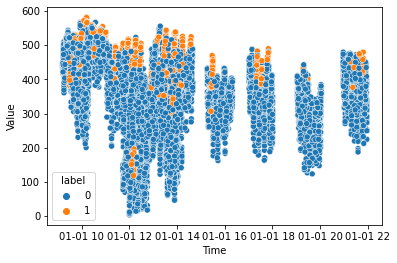

In [171]:
import pandas as pd
import seaborn as sns
for i in range(1):
    #df=pd.read_csv(filename+".csv")
    dff2.label.replace(('YES', 'NO'), (1, 0), inplace=True)
    dff2['Time'] = pd.to_datetime(dff2['Time'], infer_datetime_format=True)
    dff2
    sns.scatterplot(data=dff2, x='Time', y='Value', hue='label')

#### Predicted y_test

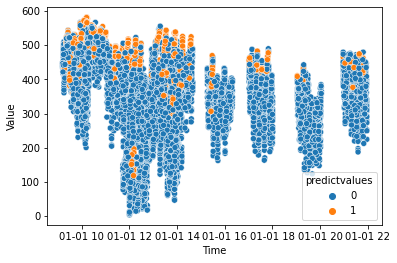

In [173]:
#def visualize_predicted_testdata(filename,predictarrall):
import pandas as pd
import seaborn as sns
for i in range(1):
    #df=pd.read_csv(filename+".csv")
    dff2['predictvalues'] = predict_y_test_arrall
    dff2.predictvalues.replace(('YES', 'NO'), (1, 0), inplace=True)
    dff2['Time'] = pd.to_datetime(dff2['Time'], infer_datetime_format=True)
    sns.scatterplot(data=dff2, x='Time', y='Value', hue='predictvalues')

# End of Experiment-----------------------------------------------------------------------

#### Max_depth [10,340,10]

In [34]:
remove_symbols_dupvalues ('gsrvideodata')

In [35]:
featureextraction ('gsrvideodata','SNew')

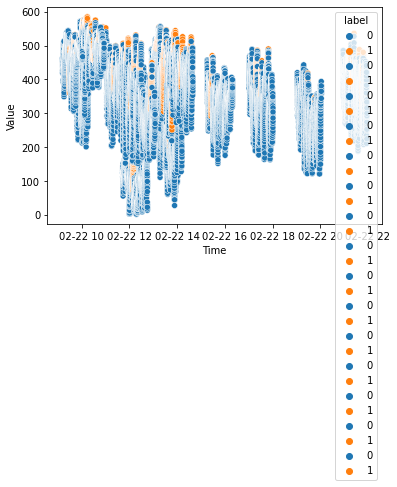

In [36]:
analys_values ('SNew')

In [37]:
dataframes_list=put_csv_to_dataframe('SNew')

In [38]:
df1=put_list_to_df (dataframes_list)

In [39]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [40]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


In [41]:
df4=df2

In [42]:
df4=new_feature_creation(df4)

In [43]:
df4

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin,meanplusmedian,...,meanmulmedian,maxmulmin,meanmulmax,meanmulmin,medianmulmax,medianmulmin,medianmulmean,medianmulmeanmulstd,meanmulmaxmulmin,medianmulmaxmulmin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0,700.000000,...,122500.000000,122499.0,122850.000000,122150.000000,122850.0,122150.0,122500.000000,1.732412e+05,4.287465e+07,42874650.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0,701.333333,...,122967.000000,122499.0,122967.000000,122266.333333,123201.0,122499.0,122967.000000,1.419901e+05,4.291548e+07,42997149.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0,701.750000,...,123113.250000,122848.0,123464.000000,122411.750000,123552.0,122499.0,123113.250000,1.549141e+05,4.308894e+07,43119648.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0,697.400000,...,121586.400000,115808.0,121932.800000,113965.600000,123552.0,115479.0,121586.400000,1.190057e+06,4.011589e+07,40648608.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0,693.333333,...,120166.666667,115456.0,120853.333333,112613.333333,123200.0,114800.0,120166.666667,1.386177e+06,3.963989e+07,40409600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0,524.416667,...,68753.125000,65968.0,79622.666667,56835.916667,79800.0,56962.5,68753.125000,1.583944e+06,1.727812e+07,17316600.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0,526.183333,...,69217.058333,65968.0,79855.733333,57002.283333,80104.0,57179.5,69217.058333,1.621807e+06,1.732869e+07,17382568.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0,528.866667,...,69923.850000,65968.0,80063.466667,57150.566667,80712.0,57613.5,69923.850000,1.661994e+06,1.737377e+07,17514504.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0,531.916667,...,70731.458333,65968.0,80382.666667,57378.416667,81320.0,58047.5,70731.458333,1.686293e+06,1.744304e+07,17646440.0


In [44]:
X = define_x_wextra_f(df4)
y = define_y_wextra_f(df4)
x_y_info(X,y)

X.shape
(55167, 27)
y.shape
(55167,)
X
[[ 2.00000000e+00  3.50000000e+02  3.50000000e+02 ...  1.73241161e+05
   4.28746500e+07  4.28746500e+07]
 [ 0.00000000e+00  3.50333333e+02  3.51000000e+02 ...  1.41990061e+05
   4.29154830e+07  4.29971490e+07]
 [ 1.00000000e+00  3.50750000e+02  3.51000000e+02 ...  1.54914109e+05
   4.30889360e+07  4.31196480e+07]
 ...
 [-2.00000000e+00  2.63366667e+02  2.65500000e+02 ...  1.66199449e+06
   1.73737723e+07  1.75145040e+07]
 [ 2.00000000e+00  2.64416667e+02  2.67500000e+02 ...  1.68629310e+06
   1.74430387e+07  1.76464400e+07]
 [-2.70000000e+01  2.65300000e+02  2.69000000e+02 ...  1.64297756e+06
   1.76626128e+07  1.79089440e+07]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [45]:
X_norm=normalization(X)

In [46]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [47]:
print(X_train)

[[0.55963303 0.51435984 0.5        ... 0.26937099 0.12322145 0.11987568]
 [0.5        0.84008085 0.81768953 ... 0.32630047 0.61113751 0.59542701]
 [0.51834862 0.51740678 0.47563177 ... 0.28458431 0.13951055 0.12888619]
 ...
 [0.53211009 0.37595028 0.38267148 ... 0.0636883  0.05810128 0.05891375]
 [0.55963303 0.42117171 0.42779783 ... 0.12509688 0.06671786 0.06755519]
 [0.53669725 0.44618077 0.45577617 ... 0.04950654 0.09738858 0.0991496 ]]


In [48]:
smote_train_arr = smote(X_train, y_train)
X_train_sm = smote_train_arr[0]
y_train_sm = smote_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


In [49]:
depth_arr = [10,340,10]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 340, 10], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [50]:
rf_randomcv = train_model_rf_Normalization_sampling_wscoring(random_grid,X_train_sm,y_train_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [51]:
model_to_pickle(rf_randomcv,'rfnormalization_sm_E2_wextra_f')

In [52]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 340, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [53]:
best_random_grid=rf_randomcv.best_estimator_

In [54]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=340, n_estimators=600)

In [55]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_depth': 340,
 'criterion': 'entropy'}

In [56]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11490   256]
 [  164  1882]]
Accuracy Score 0.9695475638051044
Classification report: 
              precision    recall  f1-score   support

          NO       0.99      0.98      0.98     11746
         YES       0.88      0.92      0.90      2046

    accuracy                           0.97     13792
   macro avg       0.93      0.95      0.94     13792
weighted avg       0.97      0.97      0.97     13792



#### max_depth = [2, 4, 10, 20, 50]


In [80]:
remove_symbols_dupvalues ('gsrvideodata')

In [81]:
featureextraction ('gsrvideodata','SNew')

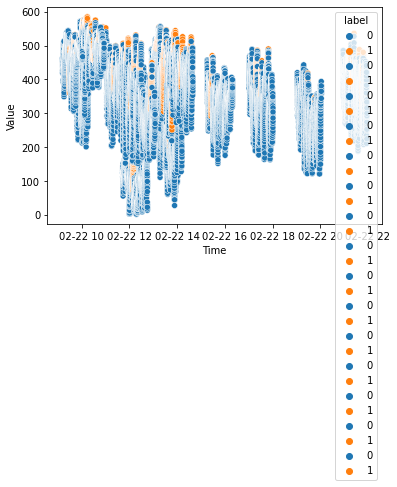

In [82]:
analys_values ('SNew')

In [83]:
dataframes_list=put_csv_to_dataframe('SNew')

In [84]:
df1=put_list_to_df (dataframes_list)

In [85]:
df1=datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [86]:
df2=reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


In [87]:
df4=df2

In [88]:
df4=new_feature_creation(df4)

In [89]:
df4

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin,meanplusmedian,...,meanmulmedian,maxmulmin,meanmulmax,meanmulmin,medianmulmax,medianmulmin,medianmulmean,medianmulmeanmulstd,meanmulmaxmulmin,medianmulmaxmulmin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0,700.000000,...,122500.000000,122499.0,122850.000000,122150.000000,122850.0,122150.0,122500.000000,1.732412e+05,4.287465e+07,42874650.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0,701.333333,...,122967.000000,122499.0,122967.000000,122266.333333,123201.0,122499.0,122967.000000,1.419901e+05,4.291548e+07,42997149.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0,701.750000,...,123113.250000,122848.0,123464.000000,122411.750000,123552.0,122499.0,123113.250000,1.549141e+05,4.308894e+07,43119648.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0,697.400000,...,121586.400000,115808.0,121932.800000,113965.600000,123552.0,115479.0,121586.400000,1.190057e+06,4.011589e+07,40648608.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0,693.333333,...,120166.666667,115456.0,120853.333333,112613.333333,123200.0,114800.0,120166.666667,1.386177e+06,3.963989e+07,40409600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0,524.416667,...,68753.125000,65968.0,79622.666667,56835.916667,79800.0,56962.5,68753.125000,1.583944e+06,1.727812e+07,17316600.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0,526.183333,...,69217.058333,65968.0,79855.733333,57002.283333,80104.0,57179.5,69217.058333,1.621807e+06,1.732869e+07,17382568.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0,528.866667,...,69923.850000,65968.0,80063.466667,57150.566667,80712.0,57613.5,69923.850000,1.661994e+06,1.737377e+07,17514504.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0,531.916667,...,70731.458333,65968.0,80382.666667,57378.416667,81320.0,58047.5,70731.458333,1.686293e+06,1.744304e+07,17646440.0


In [90]:
X = define_x_wextra_f(df4)
y = define_y_wextra_f(df4)
x_y_info(X,y)

X.shape
(55167, 27)
y.shape
(55167,)
X
[[ 2.00000000e+00  3.50000000e+02  3.50000000e+02 ...  1.73241161e+05
   4.28746500e+07  4.28746500e+07]
 [ 0.00000000e+00  3.50333333e+02  3.51000000e+02 ...  1.41990061e+05
   4.29154830e+07  4.29971490e+07]
 [ 1.00000000e+00  3.50750000e+02  3.51000000e+02 ...  1.54914109e+05
   4.30889360e+07  4.31196480e+07]
 ...
 [-2.00000000e+00  2.63366667e+02  2.65500000e+02 ...  1.66199449e+06
   1.73737723e+07  1.75145040e+07]
 [ 2.00000000e+00  2.64416667e+02  2.67500000e+02 ...  1.68629310e+06
   1.74430387e+07  1.76464400e+07]
 [-2.70000000e+01  2.65300000e+02  2.69000000e+02 ...  1.64297756e+06
   1.76626128e+07  1.79089440e+07]]
y
['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [91]:
X_norm=normalization(X)

In [92]:
traintestarr=devide_training_testing(X_norm,y)
X_train = traintestarr[0]
X_test = traintestarr[1]
y_train = traintestarr[2]
y_test = traintestarr[3]

In [93]:
print(X_train)

[[0.55963303 0.51435984 0.5        ... 0.26937099 0.12322145 0.11987568]
 [0.5        0.84008085 0.81768953 ... 0.32630047 0.61113751 0.59542701]
 [0.51834862 0.51740678 0.47563177 ... 0.28458431 0.13951055 0.12888619]
 ...
 [0.53211009 0.37595028 0.38267148 ... 0.0636883  0.05810128 0.05891375]
 [0.55963303 0.42117171 0.42779783 ... 0.12509688 0.06671786 0.06755519]
 [0.53669725 0.44618077 0.45577617 ... 0.04950654 0.09738858 0.0991496 ]]


In [94]:
smote_train_arr = smote(X_train, y_train)
X_train_sm = smote_train_arr[0]
y_train_sm = smote_train_arr[1]

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


In [95]:
depth_arr = [2, 4, 10, 20, 50]
random_grid = rs_random_grid(depth_arr)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [2, 4, 10, 20, 50], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [96]:
rf_randomcv = train_model_rf_Normalization_sampling_wscoring(random_grid,X_train_sm,y_train_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [97]:
model_to_pickle(rf_randomcv,'rfnormalization_sm_E3_wextra_f')

In [98]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [99]:
best_random_grid=rf_randomcv.best_estimator_

In [100]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=200)

In [101]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_depth': 50,
 'criterion': 'entropy'}

In [102]:
prediction_and_accuracy(X_test,y_test,rf_randomcv)

[[11488   258]
 [  158  1888]]
Accuracy Score 0.9698375870069605
Classification report: 
              precision    recall  f1-score   support

          NO       0.99      0.98      0.98     11746
         YES       0.88      0.92      0.90      2046

    accuracy                           0.97     13792
   macro avg       0.93      0.95      0.94     13792
weighted avg       0.97      0.97      0.97     13792



### predict test data with optimized model

In [106]:
remove_symbols_dupvalues_test ('gsrvideodatatest1')

In [107]:
featureextraction_test ('gsrvideodatatest1','SNewtest1')

In [108]:
dataframes_list = put_csv_to_dataframe_test('SNewtest1')

In [109]:
df1 = put_list_to_df(dataframes_list)

In [110]:
df1 = datetime_to_obj(df1)

'prev df1 type'

Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,09:46:39,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,09:46:40,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
2,09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
3,09:46:42,531.0,NO,1.0,530.200000,530.0,0.447214,531.0,530.0
4,09:46:43,533.0,NO,2.0,530.666667,530.0,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3721,10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3722,10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3723,10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3724,10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


'after df1 type'

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [111]:
df2 = reset_index(df1)

'reset indexed dataframe'

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,09:46:39,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,09:46:40,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
2,09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
3,09:46:42,531.0,NO,1.0,530.200000,530.0,0.447214,531.0,530.0
4,09:46:43,533.0,NO,2.0,530.666667,530.0,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3721,10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3722,10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3723,10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3724,10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [112]:
df4 = time_conversion_test(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        3726 non-null   object 
 1   Value       3726 non-null   float64
 2   label       3726 non-null   object 
 3   dropValue   3726 non-null   float64
 4   rollmean    3726 non-null   float64
 5   rollmedian  3726 non-null   float64
 6   rollstd     3726 non-null   float64
 7   rollMax     3726 non-null   float64
 8   rollMin     3726 non-null   float64
dtypes: float64(7), object(2)
memory usage: 262.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        3726 non-null   datetime64[ns]
 1   Value       3726 non-null   float64       
 2   label       3726 non-null   object        
 3   dropValue   3726 non-null   float64   

In [114]:
df4 = new_feature_creation(df4)

In [116]:
X = define_x_wextra_f(df4)

In [117]:
X_normg = normalization(X)

In [118]:
predictarrall = predict_data(X_normg,'modelrfnormalization_sm_E1_wextra_f')

['YES' 'YES' 'YES' ... 'NO' 'NO' 'NO']


In [119]:
drowsy_percentage(df4,'modelrfnormalization_sm_E1_wextra_f')

9.090909090909092%
9.917355371900827%
8.333333333333332%
14.87603305785124%
9.090909090909092%
7.43801652892562%
1.6666666666666667%
3.3333333333333335%
8.264462809917356%
1.6528925619834711%
1.6528925619834711%
14.049586776859504%
8.333333333333332%
1.6528925619834711%
14.87603305785124%
14.049586776859504%
7.43801652892562%
6.666666666666667%
8.264462809917356%
10.743801652892563%
17.355371900826448%
0.0%
0.8264462809917356%
4.132231404958678%
4.132231404958678%
49.586776859504134%
1.6666666666666667%
0.0%
17.355371900826448%
4.132231404958678%
1.6528925619834711%


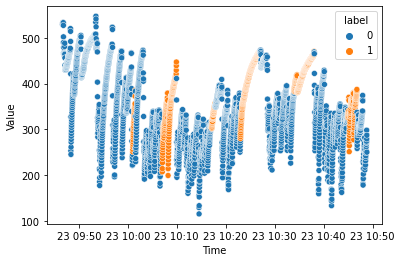

In [120]:
visualize_actual_testdata('SNewtest1')

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin,predictvalues
0,2022-02-23 09:46:39,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0,1
1,2022-02-23 09:46:40,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0,1
2,2022-02-23 09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0,1
3,2022-02-23 09:46:42,531.0,NO,1.0,530.200000,530.0,0.447214,531.0,530.0,1
4,2022-02-23 09:46:43,533.0,NO,2.0,530.666667,530.0,1.211060,533.0,530.0,1
...,...,...,...,...,...,...,...,...,...,...
3721,2022-02-23 10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0,0
3722,2022-02-23 10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0,0
3723,2022-02-23 10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0,0
3724,2022-02-23 10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0,0


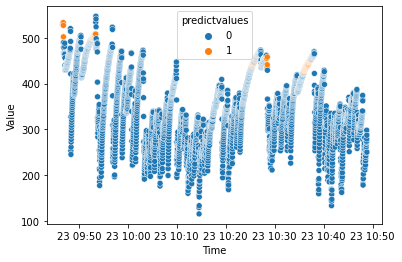

In [121]:
visualize_predicted_testdata('SNewtest1',predictarrall)

### Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth'],
                  rf_randomcv.best_params_['max_depth']+10,
                  rf_randomcv.best_params_['max_depth']-10],
    #'max_features': [rf_randomcv.best_params_['max_features']],
    #'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
    #                     rf_randomcv.best_params_['min_samples_leaf']+2, 
    #                     rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [780, 790, 770], 'min_samples_split': [2, 3, 4], 'n_estimators': [900, 1000, 1100, 1100]}


In [69]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=4,n_jobs=-1,verbose=1)
grid_search.fit(X_train_smenn,y_train_smenn)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [780, 790, 770],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [900, 1000, 1100, 1100]},
             verbose=1)

In [70]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=780, n_estimators=900)

In [71]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=780, n_estimators=900)

In [72]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11113   633]
 [  153  1893]]
Accuracy Score 0.9430104408352669
Classification report:               precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.93      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



# #SVM classifier

#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y

In [ ]:
#X = dataset.iloc[:, [3, 8]].values
#X = df2.iloc[:, [3,8]].values
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values
#X = X.reshape(-1, 1)

In [ ]:
X.shape

(55167, 6)

In [ ]:
y.shape

(55167,)

In [ ]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### devide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  5.         306.93333333 299.          64.61197524 397.
  192.        ]
 [ -8.         486.88333333 475.          31.05822398 544.
  438.        ]
 [ -4.         308.61666667 285.5         71.09890263 427.
  201.        ]
 ...
 [ -1.         230.46666667 234.          25.99639262 280.
  171.        ]
 [  5.         255.45       259.          41.62154958 320.
  155.        ]
 [  0.         269.26666667 274.5         14.74399236 291.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         470.08333333 473.5         18.50816738 497.
  429.        ]
 [  1.         458.38333333 460.          13.58849422 476.
  429.        ]
 [  1.         466.38333333 467.          11.92361518 488.
  444.        ]
 ...
 [-14.         433.05       447.          48.9238166  495.
  315.        ]
 [ -7.         507.31666667 507.          11.69744528 527.
  486.        ]
 [ -1.         550.35       552.           7.70829401 559.
  536.        ]]


#### train the model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
perm_importance = permutation_importance(classifier, X_test, y_test)


In [ ]:
features_names = ['dropValue','rollmean', 'rollmedian','rollstd','rollMax','rollMin'] 


Text(0.5, 0, 'Permutation Importance')

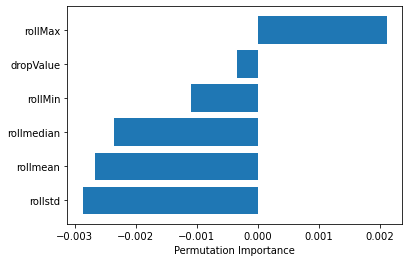

In [ ]:
features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

#### predict test data

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### confussion matrix and accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[11630   116]
 [ 1955    91]]


0.8498404872389791

Save SVM to Pickle


In [ ]:
#save svm to pickle

In [ ]:
import pickle


In [ ]:
pickle.dump(classifier, open('modelsvm.pkl', 'wb'))


In [ ]:
#preprocess test data

Preprocess test data

In [ ]:
import pandas as pd

from dateutil.parser import parse


In [ ]:

    newlevel = ','
    stocklevel = ' --> '
    s = open("gsrvideodatatest1.csv").read()
    s = s.replace (stocklevel ,newlevel) #be careful - will currently replace any number in the file matching stock level!
    f = open("gsrvideodatatest1.csv", 'w')
    f.write(s)
    f.close()
    col_Names=["Time", "Value","","label"]
    df = pd.read_csv("gsrvideodatatest1.csv",names=col_Names)
    q=df['Time'].min()
    df = df.drop(df.index[df['Time'] == q])
    df.to_csv("gsrvideodatatest1.csv", index = False,header=False)

In [ ]:
for i in range(1):
    #define column names
    col_Names=["Time", "Value","","label"]
    dataframe = pd.read_csv("gsrvideodatatest"+str(i+1)+".csv",parse_dates=['Time'],names=col_Names)

    dataframe.dtypes

    dataframe['Time'] = pd.to_datetime(dataframe['Time'], infer_datetime_format = True)


    dataframe.dtypes

    #set time as index
    indexed_dataset = dataframe.set_index(['Time'])

    indexed_dataset.index.inferred_type == "datetime64"

    indexed_dataset.dtypes

    indexed_dataset.head()

    #remove non value row
    indexed_dataset = indexed_dataset.iloc[:-1 , :]

    #remove NAN column
    indexed_dataset = indexed_dataset.dropna(axis=1)


    indexed_dataset

    indexed_dataset.dtypes

    indexed_dataset.index.inferred_type == "datetime64"
    
    #define value as float
    indexed_dataset['Value'] = indexed_dataset['Value'].astype(float)


    indexed_dataset.dtypes


    #get dropvalue feature
    indexed_dataset['dropValue'] = indexed_dataset['Value'].diff()
    
    #get rollmean feature
    indexed_dataset['rollmean'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).mean()
    
    #get rollmedian feature
    indexed_dataset['rollmedian'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).median()
    
    #get rollstd feature
    indexed_dataset['rollstd'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).std()
    
    #get rollmax feature
    indexed_dataset['rollMax'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).max()
    
    #get rollmin feature
    indexed_dataset['rollMin'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).min()

    indexed_dataset
    
    #remove non value rows
    indexed_dataset = indexed_dataset.iloc[1: , :]


    indexed_dataset

    #write to csv files
    indexed_dataset.to_csv("SNewtest"+str(i+1)+".csv", index = True)


In [ ]:
import pandas as pd

dataframes_list = []

for i in range(1):

    df=pd.read_csv("SNewtest"+str(i+1)+".csv")
    dataframes_list.append(df)

In [ ]:
df1=pd.concat(dataframes_list)

In [ ]:
df1['Time'] = pd.to_datetime(df1['Time'], infer_datetime_format = True)


In [ ]:
df1['Time']=df1['Time'].dt.time 
df2=df1

In [ ]:
df2.index = range(len(df2))


In [ ]:
df2

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,09:46:42,531.0,NO,1.0,530.333333,530.0,0.577350,531.0,530.0
2,09:46:43,533.0,NO,2.0,531.000000,530.5,1.414214,533.0,530.0
3,09:46:44,532.0,NO,-1.0,531.200000,531.0,1.303840,533.0,530.0
4,09:46:45,532.0,NO,0.0,531.333333,531.5,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3720,10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3721,10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3722,10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3723,10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [ ]:
df2.shape

(3725, 9)

In [ ]:
df2.dtypes

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [ ]:
time1 = df2.loc[0,'Time']
print(time1)

09:46:41


In [ ]:
df3=df2

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        3725 non-null   object 
 1   Value       3725 non-null   float64
 2   label       3725 non-null   object 
 3   dropValue   3725 non-null   float64
 4   rollmean    3725 non-null   float64
 5   rollmedian  3725 non-null   float64
 6   rollstd     3725 non-null   float64
 7   rollMax     3725 non-null   float64
 8   rollMin     3725 non-null   float64
dtypes: float64(7), object(2)
memory usage: 262.0+ KB


In [ ]:
df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        3725 non-null   datetime64[ns]
 1   Value       3725 non-null   float64       
 2   label       3725 non-null   object        
 3   dropValue   3725 non-null   float64       
 4   rollmean    3725 non-null   float64       
 5   rollmedian  3725 non-null   float64       
 6   rollstd     3725 non-null   float64       
 7   rollMax     3725 non-null   float64       
 8   rollMin     3725 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 262.0+ KB


In [ ]:
df3

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,1900-01-01 09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,1900-01-01 09:46:42,531.0,NO,1.0,530.333333,530.0,0.577350,531.0,530.0
2,1900-01-01 09:46:43,533.0,NO,2.0,531.000000,530.5,1.414214,533.0,530.0
3,1900-01-01 09:46:44,532.0,NO,-1.0,531.200000,531.0,1.303840,533.0,530.0
4,1900-01-01 09:46:45,532.0,NO,0.0,531.333333,531.5,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3720,1900-01-01 10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3721,1900-01-01 10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3722,1900-01-01 10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3723,1900-01-01 10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [ ]:
time1 = df3.loc[0,'Time']
type(time1)


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
from datetime import timedelta

In [ ]:
start_time = time1 + timedelta(minutes = 13)
start_time

Timestamp('1900-01-01 09:59:41')

In [ ]:
end_time = time1 + timedelta(minutes = 15)
end_time

Timestamp('1900-01-01 10:01:41')

In [ ]:
df4=df3.loc[(df3['Time'] >= start_time) & (df3['Time'] <= end_time)]

In [ ]:
df4

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
779,1900-01-01 09:59:41,387.0,NO,-25.0,353.766667,363.5,56.423750,471.0,238.0
780,1900-01-01 09:59:42,343.0,NO,-44.0,351.633333,360.5,54.295790,470.0,238.0
781,1900-01-01 09:59:43,336.0,NO,-7.0,349.400000,358.0,52.054144,456.0,238.0
782,1900-01-01 09:59:44,338.0,NO,2.0,347.433333,355.5,50.152772,413.0,238.0
783,1900-01-01 09:59:45,341.0,NO,3.0,346.416667,352.5,49.643574,413.0,238.0
...,...,...,...,...,...,...,...,...,...
894,1900-01-01 10:01:37,249.0,NO,13.0,317.333333,313.5,68.753223,467.0,221.0
895,1900-01-01 10:01:38,256.0,NO,7.0,314.416667,309.5,67.550933,467.0,221.0
896,1900-01-01 10:01:39,260.0,NO,4.0,311.550000,305.5,66.110699,467.0,221.0
897,1900-01-01 10:01:40,266.0,NO,6.0,308.766667,302.5,64.404276,467.0,221.0


In [ ]:
pickled_model = pickle.load(open('modelsvm.pkl', 'rb'))


In [ ]:
X_testactual = df4.iloc[:, 3:9].values
X_testactual

array([[-25.        , 353.76666667, 363.5       ,  56.42374986,
        471.        , 238.        ],
       [-44.        , 351.63333333, 360.5       ,  54.2957896 ,
        470.        , 238.        ],
       [ -7.        , 349.4       , 358.        ,  52.05414391,
        456.        , 238.        ],
       [  2.        , 347.43333333, 355.5       ,  50.15277226,
        413.        , 238.        ],
       [  3.        , 346.41666667, 352.5       ,  49.64357424,
        413.        , 238.        ],
       [ -3.        , 346.51666667, 352.5       ,  49.6200792 ,
        413.        , 238.        ],
       [  1.        , 347.65      , 352.5       ,  48.63277301,
        413.        , 238.        ],
       [  1.        , 349.11666667, 352.5       ,  46.99877087,
        413.        , 238.        ],
       [  2.        , 350.61666667, 352.5       ,  45.25037379,
        413.        , 238.        ],
       [  1.        , 352.36666667, 352.5       ,  42.78442876,
        413.        , 248. 

In [ ]:
arr=pickled_model.predict(X_testactual)
arr


array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'],
      dtype=object)

In [ ]:
type(arr)

numpy.ndarray

In [ ]:
cot=0
for tag in arr:
    if(tag=='YES'):
        cot=cot+1
        
percentage=cot/len(arr)*100

In [ ]:
print(str(percentage)+"%")

0.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values

In [ ]:
X.shape

(55152, 6)

In [ ]:
y.shape

(55152,)

In [ ]:
print(X)

[[  0.         351.         351.           0.         351.
  351.        ]
 [  1.         351.33333333 351.           0.57735027 352.
  351.        ]
 [-23.         345.75       351.          11.17661249 352.
  329.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  6.         167.01666667 165.5         32.52195695 216.
   99.        ]
 [  0.         428.38333333 428.          11.3183392  449.
  403.        ]
 [  3.         348.21666667 366.          70.88641946 433.
  203.        ]
 ...
 [ 26.         220.51666667 225.5         35.28263205 280.
  139.        ]
 [ 12.         258.88333333 261.          40.53167486 320.
  152.        ]
 [  1.         269.55       274.5         15.01685494 292.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         470.08333333 473.5         18.50816738 497.
  429.        ]
 [  1.         458.38333333 460.          13.58849422 476.
  429.        ]
 [  1.         466.38333333 467.          11.92361518 488.
  444.        ]
 ...
 [-14.         433.05       447.          48.9238166  495.
  315.        ]
 [ -7.         507.31666667 507.          11.69744528 527.
  486.        ]
 [ -1.         550.35       552.           7.70829401 559.
  536.        ]]


Feature: 0, Score: 0.01843
Feature: 1, Score: -0.07735
Feature: 2, Score: 0.04577
Feature: 3, Score: 0.00611
Feature: 4, Score: -0.01444
Feature: 5, Score: 0.04731


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


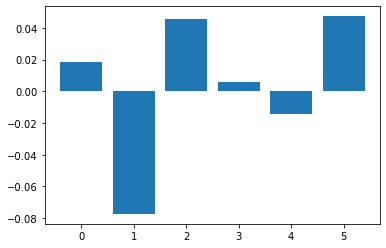

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Cross fold validation

#### define x and y

In [ ]:
data=df2.iloc[:, 3:9].values


In [ ]:
target=df2.iloc[:, 2].values

#### import libraries

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#### LogisticRegression

In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), data, target,cv=3)


array([0.86303307, 0.82457572, 0.86058529])

In [ ]:
# get importance
importance = LogisticRegression.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: type object 'LogisticRegression' has no attribute 'coef_'

#### support vector classifier

In [ ]:
cross_val_score(SVC(gamma='auto'), data, target,cv=3)


KeyboardInterrupt: 

#### RandomForestClassifier

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),data, target,cv=3)


array([0.85068538, 0.8203329 , 0.85226284])

RandomizedSearchCV -SVM

In [ ]:
#class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
C = [0.01, 0.1, 0.5, 1, 5, 10]
kernel=['linear', 'poly', 'rbf', 'sigmoid']
degree = [2,3,5,7]

random_grid = {'C': C,
               'kernel': kernel,
               'degree': degree,
               'gamma': ['scale', 'auto'] }
print(random_grid)

{'C': [0.01, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 5, 7], 'gamma': ['scale', 'auto']}


In [ ]:
from sklearn.svm import SVC
classifier=SVC()
SVM_randomcv=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
SVM_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
SVM_randomcv.best_params_


In [ ]:
SVM_randomcv

In [ ]:
best_random_grid_SVM=SVM_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_SVM=best_random_grid_SVM.predict(X_test)
print(confusion_matrix(y_test,y_pred_SVM))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_SVM)))
print("Classification report: {}".format(classification_report(y_test,y_pred_SVM)))
